In [1]:
# import sys
# print(sys.executable)
# print(sys.version)

# import numpy
# import matplotlib.pyplot as plt
# from matplotlib import gridspec
# import sys
# import numpy as np
# import pandas
# import pandas as pd

# sys.path.append('/Users/MattLor/synthpop/synthpop')
# from synthpop_main import SynthPop
# from synthpop_utils import half_cone_angle_to_solidangle
# from synthpop_utils.coordinates_transformation import CoordTrans

# %load_ext autoreload
# %autoreload 2

In [2]:
# # Standard library imports
# import numpy as np
# from scipy.stats import gaussian_kde

# # Third-party imports
# import astropy.units as u
# from astropy.coordinates import SkyCoord
# from astropy.table import Table
# import synthpop

# # Install required packages
# # Note: In production code, it's better to separate installation from imports
# # and handle dependencies through requirements.txt or setup.py
# def install_required_packages():
#     """
#     Install required packages that aren't available through standard pip repositories.
    
#     This function installs the ebf package from a specific GitHub repository.
#     """
#     import subprocess
#     subprocess.check_call(["pip", "install", "git+https://github.com/mhuertascompany/ebf.git"])

# # Run the installation function if needed
# install_required_packages()

In [3]:
!sh ~/.zshrc

In [1]:
!echo $PYTHONPATH

/Users/MattLor/synthpop


In [2]:
# First, install all required packages
import sys
import subprocess

# Install packages using subprocess to ensure they're available in the current session
#subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib', 'numpy', 'astropy', 'scipy', 'synthpop'])

# Now import the packages after installation
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import synthpop
from scipy.stats import gaussian_kde
from astropy.table import Table
# !pip install ebfpy

# For installing the current package in development mode
# Use subprocess instead of !pip
# subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-e', '.'])

# Uncomment these if you need them later
# subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'git+https://github.com/mhuertascompany/ebf.git'])
# subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'ebf'])
# subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', '--no-input', 'git+https://github.com/mfouesneau/ebf.git'])

/Users/MattLor/opt/anaconda3/lib/python3.13/site-packages/pydantic/_internal/_config.py:345: UserWarning: Valid config keys have changed in V2:
* 'keep_untouched' has been renamed to 'ignored_types'
  warnings.warn(message, UserWarning)


In [3]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import synthpop
from scipy.stats import gaussian_kde
from astropy.table import Table
import pandas as pd
# !pip install git+https://github.com/mhuertascompany/ebf.git
# !pip install ebf
# !pip install --upgrade --no-input git+https://github.com/mfouesneau/ebf.git

# Load the VOTable

In [87]:
votable_path = "../356616_observations_288315_unique_280820.vot"  # Going up 1 level from current locationdata_table = Table.read(votable_path, format="votable")
data_table = Table.read(votable_path, format="votable")
df = data_table.to_pandas()
df.columns

Index(['source_id', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'phot_g_mean_mag', 'bp_rp', 'radial_velocity', 'radial_velocity_error',
       'teff_val', 'target_id', 'target_ra', 'target_dec', 'target_parallax',
       'target_pm_ra', 'target_pm_dec', 'target_radial_velocity', 'r_est',
       'r_lo', 'r_hi', 'r_len', 'target_observed_by', 'source_observed_by',
       'fwhm_arcmin', 'offset_deg', 'offset_arcmin',
       'telescope_response_gaussian', 'min_detectable_EIRP', 'price_target_'],
      dtype='object')

# Regions Queried in Gaia catalog

In [224]:
df

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_over_error,pmra,pmra_error,pmdec,...,r_hi,r_len,target_observed_by,source_observed_by,fwhm_arcmin,offset_deg,offset_arcmin,telescope_response_gaussian,min_detectable_EIRP,price_target_
0,5278042880077383040,124.373564,0.531406,-61.916283,0.577067,191.530069,317.248718,-156.445708,1.257197,1099.603065,...,5.237054,854.145623,Parkes 10-cm,Parkes 10-cm,6.4,0.004946,0.296757,0.994057,9.979345e+10,True
1,5278019446732658176,124.323083,0.683469,-61.933165,0.722185,0.288692,0.386957,-9.208477,1.665850,4.106262,...,3424.169938,852.574779,Parkes 10-cm,Parkes 10-cm,6.4,0.053314,3.198850,0.500249,2.571122e+16,False
2,5278042914437037440,124.321704,0.017173,-61.921527,0.019508,0.306640,15.678685,1.455955,0.039321,-3.939431,...,3149.749330,852.831089,Parkes 10-cm,Parkes 10-cm,6.4,0.053294,3.197619,0.500516,6.391667e+16,False
3,5277995665498104576,124.405225,0.123812,-61.964518,0.137092,0.162447,1.190629,2.031666,0.288846,-0.058157,...,4666.506808,853.656804,Parkes 10-cm,Parkes 10-cm,6.4,0.052973,3.178368,0.504692,7.781783e+16,False
4,5277996009096662912,124.427643,0.465830,-61.920097,0.409031,0.134454,0.301610,-3.008525,1.080743,5.900701,...,3767.438101,855.297497,Parkes 10-cm,Parkes 10-cm,6.4,0.052656,3.159362,0.508823,3.617772e+16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356611,5353625817648324352,162.327898,0.169651,-53.323989,0.188827,0.002797,0.012486,-7.121278,0.332859,4.258981,...,6063.476843,1216.497976,Parkes 10-cm,Parkes 10-cm,6.4,0.004614,0.276850,0.994825,5.451843e+16,False
356612,5353625847691839616,162.331233,0.148051,-53.317264,0.161793,0.107848,0.543369,-6.472833,0.280615,0.680678,...,5731.854286,1216.642346,Parkes 10-cm,Parkes 10-cm,6.4,0.003272,0.196336,0.997394,4.785815e+16,False
356613,5353625817648467840,162.328145,0.401868,-53.322196,0.451638,-0.629335,-1.170949,-5.444157,0.841270,1.893667,...,5795.023651,1216.522702,Parkes 10-cm,Parkes 10-cm,6.4,0.002810,0.168584,0.998078,4.466139e+16,False
356614,5353625847691839488,162.328315,0.037486,-53.318426,0.041577,0.150904,3.040733,-4.872873,0.072231,1.066499,...,6255.618265,1216.567137,Parkes 10-cm,Parkes 10-cm,6.4,0.001153,0.069207,0.999676,8.723952e+16,False


In [88]:
df_small = df.loc[[0, 500, 5000, 50000, 100000, 200000, 300000], ["ra", "dec", "fwhm_arcmin"]].copy()
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [171]:
def get_synthpop_catalog_from_ra_dec(ra_deg, dec_deg, fwhm_arcmin, config_file='my_config.synthpop_conf'):
    """
    Generate SynthPop star catalog from RA/Dec + radius (in arcmin).

    Parameters:
    - ra_deg (float): Right Ascension in degrees
    - dec_deg (float): Declination in degrees
    - fwhm_arcmin (float): FWHM in arcminutes
    - config_file (str): path to SynthPop config file

    Returns:
    - region_synth (pd.DataFrame): SynthPop star catalog in a pandas DataFrame
    """
    # Convert RA/Dec to Galactic l,b
    coord = SkyCoord(ra=ra_deg * u.deg, dec=dec_deg * u.deg, frame='icrs')
    l = coord.galactic.l.deg
    b = coord.galactic.b.deg

    # Convert FWHM to radius and from arcmin to deg, then compute solid angle in deg²
    radius_deg = (fwhm_arcmin / 2) / 60
    solid_angle_deg2 = np.pi * radius_deg**2
    print(solid_angle_deg2)

    # Initialize SynthPop
    mod = synthpop.SynthPop('huston2025_defaults.synthpop_conf',
                         extinction_map_kwargs={'name':'maps_from_dustmaps', 'dustmap_name': 'sfd'},
                         chosen_bands = ['Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', "Gaia_G_EDR3", "Gaia_BP_EDR3", "Gaia_RP_EDR3"],
                         maglim = ['Bessell_I', 99, "keep"],
                         post_processing_kwargs=[{"name": "ProcessDarkCompactObjects","remove": False}, 
                        {"name":"equatorial_coordinates"}],
                         name_for_output='mod2test'
                        )
    mod.init_populations()

    # Run catalog simulation
    cat, distr = mod.process_location(l_deg=l, b_deg=b,
                                  solid_angle=solid_angle_deg2,
                                  solid_angle_unit='deg^2')
    cat["Dist_pc"] = cat["Dist"] * 1000
    cat = process_beam_vectorized(ra_deg, dec_deg, fwhm_arcmin, cat)
    return cat

# Row 0

In [168]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [169]:
df_small.loc[0]

ra             124.373564
dec            -61.916283
fwhm_arcmin      6.400000
Name: 0, dtype: float64

In [170]:
region_1synth = get_synthpop_catalog_from_ra_dec(124.373564, -61.916283, 6.4)
# Display both the catalog and its length on one line
region_1synth



################################ Settings #################################
 93992583 - # reading default parameters from
 93992587 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 93992590 - # read configuration from 
 93992591 - config_file = 'huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 93992592 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 1186780191,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "amp_wa

0.00893608577021097




# Population 1;  halo -----------------------------------------------------
 93993324 - # Initialize Population 1 (halo) from 
 93993324 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 93993912 - # Initialize Population 2 (nsd) from 
 93993913 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 93994909 - # Initialize Population 3 (thick_disk) from 
 93994910 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 93995502 - # Initialize Population 4 (thin_disk_1) from 
 93995502 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thin_disk_1.popjson'


# Population 5;  thin_disk_2 ----------------------------------------------
 93996141 - # Initialize P

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,theta_arcmin,scaling_factor,eirp_boost,Dist_pc
0,1.0,0.081763,14.000000,-1.930472,0.081763,0.0,0.767030,124.289293,-61.880798,-157.614574,...,NaN,NaN,NaN,NaN,NaN,0.0,3.194577,0.501175,1.995311,767.029649
1,1.0,0.418424,14.000000,-1.985529,0.418401,0.0,3.970501,124.330547,-61.937821,37.695832,...,21.743890,20.925373,21.990804,22.871921,21.061714,0.0,1.773478,0.808236,1.237262,3970.500557
2,1.0,0.681947,14.000000,-1.439856,0.681726,0.0,4.404981,124.372397,-61.865259,-55.186119,...,19.032378,18.480889,19.190235,19.728262,18.575953,0.0,3.061609,0.530206,1.886060,4404.981064
3,1.0,0.115059,14.000000,-1.615519,0.115058,0.0,4.794007,124.371315,-61.872019,43.613599,...,25.806675,24.665523,26.007732,27.298358,24.853248,0.0,2.656578,0.620198,1.612389,4794.007091
4,1.0,0.301830,14.000000,-2.052899,0.301818,0.0,5.818348,124.371832,-61.896407,50.871119,...,23.486901,22.611599,23.743604,24.710495,22.754096,0.0,1.193556,0.908074,1.101232,5818.347627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,10.0,0.205311,7.975119,-0.502254,0.205308,0.0,21.257595,124.339028,-61.924746,237.990894,...,27.817854,26.669913,28.019979,29.255595,26.870662,0.0,1.099616,0.921412,1.085291,21257.594860
2205,10.0,0.083152,8.671265,-0.347712,0.083152,0.0,21.375620,124.282019,-61.906036,254.433223,...,NaN,NaN,NaN,NaN,NaN,0.0,2.658256,0.619823,1.613363,21375.619677
2206,10.0,0.150249,8.622056,-0.323989,0.150248,0.0,22.957006,124.367195,-61.959099,231.232817,...,29.214508,27.760672,29.284408,30.777154,28.013486,0.0,2.575246,0.638321,1.566610,22957.005820
2207,10.0,0.184543,7.134548,-0.584311,0.184541,0.0,23.929315,124.410469,-61.883686,186.658464,...,28.316719,27.163014,28.517222,29.764273,27.364443,0.0,2.216513,0.717088,1.394529,23929.315499


In [94]:
synthpop

<module 'synthpop' from '/Users/MattLor/synthpop/synthpop/__init__.py'>

In [95]:
!echo $PYTHONPATH

/Users/MattLor/synthpop


In [96]:
print(f"Number of objects in catalog: {len(region_1synth)}")

Number of objects in catalog: 2190


In [97]:
region_1synth["Dist_pc"] = region_1synth["Dist"] * 1000
region_1synth = region_1synth[region_1synth['Gaia_G_EDR3'].notnull() &
        region_1synth['Gaia_BP_EDR3'].notnull() & 
        region_1synth['Gaia_RP_EDR3'].notnull()]
region_1synth

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
0,1.0,0.610349,14.000000,-1.335366,0.610240,0.0,2.442239,124.391731,-61.921361,-60.463099,...,20.471356,20.295290,19.251246,18.648849,18.019917,18.844741,19.482018,18.126868,0.0,2442.238862
1,1.0,0.440291,14.000000,-1.310624,0.440267,0.0,3.800228,124.358521,-61.900242,67.518721,...,25.063131,24.050695,22.536279,21.630127,20.784320,21.887918,22.820164,20.923939,0.0,3800.227713
2,1.0,0.529815,14.000000,-2.003182,0.529759,0.0,4.351787,124.366713,-61.924819,89.006709,...,22.940045,22.607898,21.421205,20.736612,20.033140,20.956281,21.681025,20.152718,0.0,4351.786889
3,1.0,0.398367,14.000000,-1.824265,0.398348,0.0,4.450120,124.288140,-61.922999,54.441359,...,25.523438,24.602442,23.111232,22.225745,21.382181,22.478282,23.398124,21.521988,0.0,4450.120053
4,1.0,0.113932,14.000000,-1.738323,0.113931,0.0,4.704456,124.362618,-61.912629,171.807609,...,30.828697,28.954734,26.961467,25.758195,24.636971,25.971895,27.241618,24.823463,0.0,4704.455834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,10.0,0.299530,9.135804,-0.295548,0.299525,0.0,20.680071,124.410060,-61.913836,183.784179,...,31.536538,30.106515,28.296988,27.141344,25.933978,27.315544,28.579694,26.148285,0.0,20680.070677
2185,10.0,0.108525,8.026208,-0.472404,0.108524,0.0,21.305847,124.434064,-61.883281,192.894383,...,35.477312,33.607637,31.549484,30.144389,28.522647,30.134174,31.822725,28.796368,0.0,21305.846621
2186,10.0,0.145395,7.602910,-0.160903,0.145394,0.0,22.841805,124.333267,-61.905960,242.194701,...,34.505703,33.001989,31.100115,29.714101,28.046047,29.666508,31.381265,28.318313,0.0,22841.804763
2187,10.0,0.207473,7.930951,-0.469716,0.207471,0.0,23.224658,124.405170,-61.919774,231.863194,...,32.537597,31.053997,29.202408,28.039701,26.868582,28.232196,29.485062,27.073586,0.0,23224.657963


# Histogram

In [98]:
x_1 = region_1synth[region_1synth['Dist_pc'] <= 1000]  # keep only rows within 1 kpc
x_1

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
62,3.0,0.184247,12.000000,-0.809451,0.184244,0.0,0.597129,124.405874,-61.877860,45.660504,...,24.560062,23.092061,21.244502,20.106006,19.034762,20.335644,21.526516,19.216649,0.0,597.129306
63,3.0,0.126720,12.000000,-0.435566,0.126718,0.0,0.712730,124.292256,-61.903895,43.379131,...,27.257380,25.529813,23.538388,22.207577,20.698992,22.253123,23.816308,20.959246,0.0,712.729604
65,3.0,0.195701,12.000000,-0.950321,0.195697,0.0,0.981728,124.297570,-61.949310,27.338262,...,25.244122,23.838365,22.028544,20.920204,19.899495,21.164531,22.311262,20.069982,0.0,981.727917
746,5.0,0.120531,0.379184,-0.199285,0.120531,0.0,0.384158,124.449818,-61.899624,17.952135,...,26.625012,25.005463,23.035350,21.542981,19.731090,21.414917,23.313627,20.013414,0.0,384.158446
747,5.0,0.434141,0.297685,-0.154280,0.434140,0.0,0.406889,124.392535,-61.882162,7.592334,...,22.054799,20.672554,18.923090,17.803881,16.647241,17.992106,19.204975,16.852703,0.0,406.889351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,10.0,0.275403,7.201667,-0.080846,0.275400,0.0,0.991793,124.463795,-61.944125,17.514197,...,25.601151,24.246273,22.450556,21.208810,19.762003,21.272890,22.734299,20.012233,0.0,991.793130
1392,10.0,0.144020,7.244341,-0.304004,0.144019,0.0,0.968773,124.280290,-61.901147,12.358981,...,27.382636,25.796637,23.867767,22.560368,21.048439,22.600927,24.148138,21.309460,0.0,968.773433
1393,10.0,0.111298,7.708590,-0.363649,0.111298,0.0,0.956728,124.463722,-61.909652,10.845171,...,28.804495,27.017512,24.985180,23.534971,21.816400,23.466995,25.260308,22.096505,0.0,956.727856
1394,10.0,0.218331,7.521617,-0.758992,0.218328,0.0,0.927795,124.339844,-61.893857,12.196076,...,25.071118,23.639420,21.816821,20.695984,19.647513,20.932618,22.099128,19.825062,0.0,927.795105


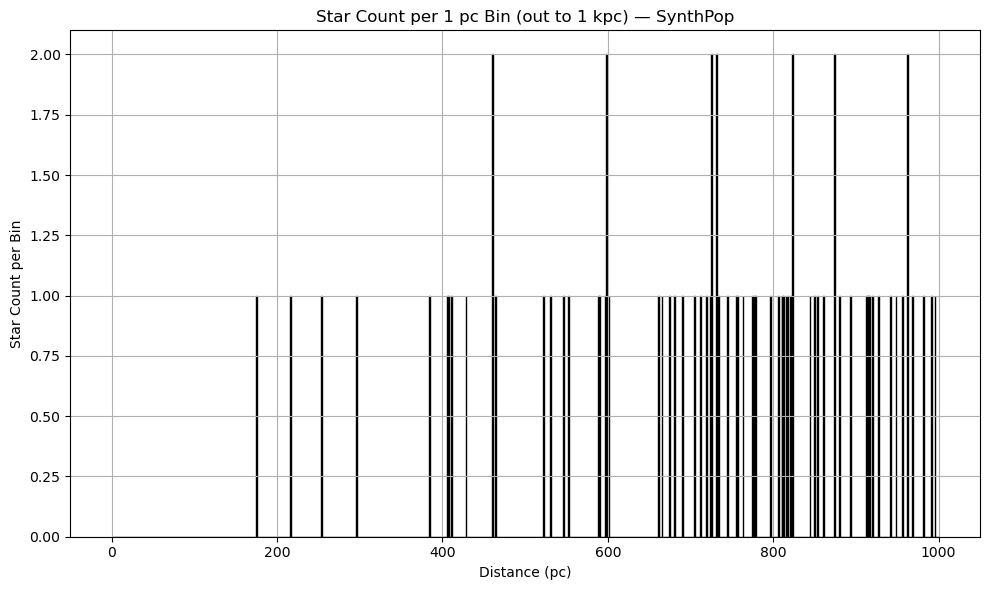

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Extract distance and population columns
distances = region_1synth['Dist_pc']

# Define bin edges: 0 to 1000 pc in 1 pc steps
bins = np.arange(0, 1001, 1)  # 1 pc bins from 0 to 1000

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=bins, color='skyblue', edgecolor='black')
plt.xlabel("Distance (pc)")
plt.ylabel("Star Count per Bin")
plt.title("Star Count per 1 pc Bin (out to 1 kpc) — SynthPop")
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde

# # Step 1: Compute color and absolute G magnitude
# region_1synth['bp_rp'] = region_1synth['Gaia_BP_EDR3'] - region_1synth['Gaia_RP_EDR3']
# region_1synth['abs_g_mag'] = region_1synth['Gaia_G_EDR3'] - 5 * np.log10(region_1synth['Dist_pc']) + 5

# # Step 2: Drop NaNs for clean plotting
# cmd_data = region_1synth.dropna(subset=['bp_rp', 'abs_g_mag'])

# # Step 3: Density estimation for color
# x = cmd_data['bp_rp']
# y = cmd_data['abs_g_mag']
# xy = np.vstack([x, y])
# density = gaussian_kde(xy)(xy)
# sqrt_density = np.sqrt(density)

# # Step 4: Normalize color scale
# norm = plt.Normalize(sqrt_density.min(), sqrt_density.max())
# cmap = plt.cm.hot
# colors = cmap(norm(sqrt_density))

# # Step 5: Plot CMD
# plt.figure(figsize=(7, 9))
# plt.scatter(x, y, c=colors, s=10, edgecolor='none')
# plt.gca().invert_yaxis()
# plt.xlabel('BP − RP (mag)')
# plt.ylabel('Absolute G-band Magnitude')
# plt.title('H-R Diagram from SynthPop (Density Colored)')
# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='√(Relative Density)')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# CMD

/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/2510884719.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_1synth['bp_rp'] = region_1synth['Gaia_BP_EDR3'] - region_1synth['Gaia_RP_EDR3']
/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/2510884719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_1synth['abs_g_mag'] = region_1synth['Gaia_G_EDR3'] - 5 * np.log10(region_1synth['Dist_pc']) + 5


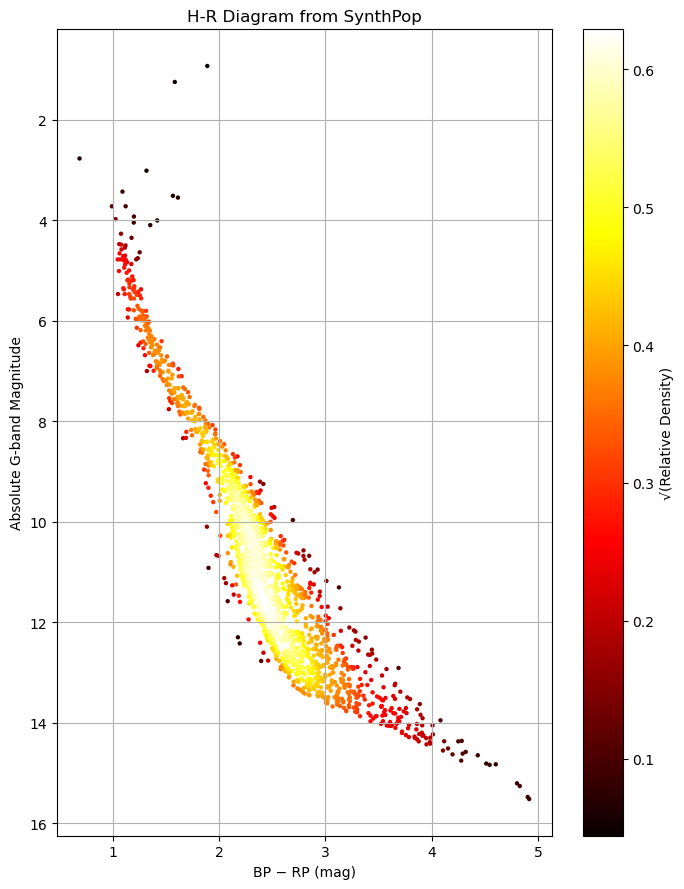

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize

# Step 1: Compute color and absolute G magnitude
region_1synth['bp_rp'] = region_1synth['Gaia_BP_EDR3'] - region_1synth['Gaia_RP_EDR3']
region_1synth['abs_g_mag'] = region_1synth['Gaia_G_EDR3'] - 5 * np.log10(region_1synth['Dist_pc']) + 5

# Step 2: Drop NaNs
cmd_data = region_1synth.dropna(subset=['bp_rp', 'abs_g_mag', 'pop'])

# Step 3: Extract coordinates and weights
x = cmd_data['bp_rp'].values
y = cmd_data['abs_g_mag'].values

# Step 4: Weighted density estimation
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)
sqrt_density = np.sqrt(density)

# Step 5: Create a consistent normalization and colormap
norm = Normalize(sqrt_density.min(), sqrt_density.max())
cmap = plt.cm.hot

# Step 6: Plot CMD
plt.figure(figsize=(7, 9))
# Use the same normalization and colormap for the scatter plot
scatter_1 = plt.scatter(x, y, c=sqrt_density, cmap=cmap, norm=norm, s=10, edgecolor='none')
plt.gca().invert_yaxis()
plt.xlabel('BP − RP (mag)')
plt.ylabel('Absolute G-band Magnitude')
plt.title('H-R Diagram from SynthPop')

# Create a colorbar using the scatter plot as the mappable
cbar = plt.colorbar(scatter_1, label='√(Relative Density)')

plt.grid(True)
plt.tight_layout()
plt.show()

# Row 500

In [102]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [103]:
region_2synth = get_synthpop_catalog_from_ra_dec(235.157257, -50.986211, 6.4)
# Display both the catalog and its length on one line
region_2synth



################################ Settings #################################
 73287013 - # reading default parameters from
 73287017 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 73287020 - # read configuration from 
 73287021 - config_file = 'huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 73287022 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 136221834,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "amp_war

0.00893608577021097




# Population 1;  halo -----------------------------------------------------
 73287756 - # Initialize Population 1 (halo) from 
 73287757 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 73288342 - # Initialize Population 2 (nsd) from 
 73288342 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 73289316 - # Initialize Population 3 (thick_disk) from 
 73289316 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 73289898 - # Initialize Population 4 (thin_disk_1) from 
 73289899 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thin_disk_1.popjson'


# Population 5;  thin_disk_2 ----------------------------------------------
 73290490 - # Initialize P

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,phase,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag
0,0.0,2.842453,10.000000,0.393771,0.703827,1.0,6.320582,235.179960,-50.996997,47.265104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,0.0,0.153263,10.000000,-0.943025,0.153261,0.0,9.732698,235.169505,-51.019188,-116.343987,...,0.0,36.903039,34.467657,31.236381,29.374309,27.452914,29.438559,31.655536,27.645069,0.0
2,1.0,0.928506,14.000000,-1.769376,0.495207,1.0,2.506209,235.181629,-50.942059,-125.399271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,0.082970,14.000000,-1.672471,0.082970,0.0,3.658690,235.147613,-50.993620,-6.116243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1.0,0.147012,14.000000,-2.231979,0.147008,0.0,3.939162,235.078129,-50.981482,21.568189,...,0.0,33.862059,31.652450,28.644378,26.943397,25.180036,27.026096,29.064067,25.343211,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125209,10.0,0.189190,8.593683,-0.121410,0.189188,0.0,24.737679,235.211457,-51.016493,129.344383,...,0.0,39.556044,37.225493,34.008334,31.982039,29.590371,31.834351,34.431162,29.857934,0.0
125210,10.0,0.345098,9.617316,-0.251791,0.345091,0.0,24.742513,235.114562,-50.981745,108.512149,...,0.0,37.280082,34.968665,31.841681,30.003027,27.996346,30.028665,32.260012,28.215789,0.0
125211,10.0,0.211903,9.874027,-0.236437,0.211900,0.0,24.822377,235.157314,-50.991393,112.413691,...,0.0,38.722552,36.367673,33.179426,31.265049,29.098611,31.226640,33.599321,29.343641,0.0
125212,10.0,0.151163,8.959588,-0.651492,0.151161,0.0,24.962437,235.112922,-51.003614,133.468741,...,0.0,39.212565,36.746159,33.511622,31.624588,29.617280,31.655204,33.927115,29.832979,0.0


In [104]:
region_2synth["Dist_pc"] = region_2synth["Dist"] * 1000
region_2synth = region_2synth[region_2synth['Gaia_G_EDR3'].notnull() &
        region_2synth['Gaia_BP_EDR3'].notnull() & 
        region_2synth['Gaia_RP_EDR3'].notnull()]
region_2synth


,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
1,0.0,0.153263,10.000000,-0.943025,0.153261,0.0,9.732698,235.169505,-51.019188,-116.343987,...,36.903039,34.467657,31.236381,29.374309,27.452914,29.438559,31.655536,27.645069,0.0,9732.697543
4,1.0,0.147012,14.000000,-2.231979,0.147008,0.0,3.939162,235.078129,-50.981482,21.568189,...,33.862059,31.652450,28.644378,26.943397,25.180036,27.026096,29.064067,25.343211,0.0,3939.161993
7,1.0,0.349839,14.000000,-1.800001,0.349825,0.0,4.617507,235.127906,-50.943818,-29.124595,...,32.020102,30.094641,27.180082,25.538429,23.838105,25.640631,27.605231,23.988461,0.0,4617.507114
8,1.0,0.284168,14.000000,-2.254081,0.284157,0.0,4.633789,235.119536,-51.011973,-130.570055,...,32.058484,30.230212,27.373924,25.775389,24.102743,25.875777,27.798913,24.251603,0.0,4633.789107
9,1.0,0.762248,14.000000,-0.924407,0.761871,0.0,4.810361,235.212754,-50.957324,-417.580239,...,25.546393,24.592087,22.390665,21.178137,19.808153,21.171282,22.708823,19.905697,0.0,4810.360961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125209,10.0,0.189190,8.593683,-0.121410,0.189188,0.0,24.737679,235.211457,-51.016493,129.344383,...,39.556044,37.225493,34.008334,31.982039,29.590371,31.834351,34.431162,29.857934,0.0,24737.678848
125210,10.0,0.345098,9.617316,-0.251791,0.345091,0.0,24.742513,235.114562,-50.981745,108.512149,...,37.280082,34.968665,31.841681,30.003027,27.996346,30.028665,32.260012,28.215789,0.0,24742.513051
125211,10.0,0.211903,9.874027,-0.236437,0.211900,0.0,24.822377,235.157314,-50.991393,112.413691,...,38.722552,36.367673,33.179426,31.265049,29.098611,31.226640,33.599321,29.343641,0.0,24822.376559
125212,10.0,0.151163,8.959588,-0.651492,0.151161,0.0,24.962437,235.112922,-51.003614,133.468741,...,39.212565,36.746159,33.511622,31.624588,29.617280,31.655204,33.927115,29.832979,0.0,24962.437029


# Histogram

In [105]:
x_2 = region_2synth[region_2synth['Dist_pc'] <= 1000]  # keep only rows within 1 kpc
x_2

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
309,3.0,0.302339,12.000000,-0.856776,0.302331,0.0,0.402262,235.091231,-50.966626,-84.846103,...,27.974959,25.735378,22.637839,20.863474,19.057844,20.960839,23.057063,19.230037,0.0,402.262264
310,3.0,0.809805,12.000000,-0.361942,0.809529,0.0,0.477630,235.162928,-51.023030,-18.199909,...,21.279645,20.150710,17.827146,16.573400,15.186718,16.607784,18.183428,15.289905,0.0,477.629774
311,3.0,0.232258,12.000000,-0.605520,0.232253,0.0,0.824756,235.201582,-51.002653,-104.136496,...,30.627088,28.266202,25.071009,23.226060,21.298378,23.289492,25.493193,21.493259,0.0,824.756450
312,3.0,0.376233,12.000000,-1.177637,0.376220,0.0,0.826701,235.157901,-51.033298,67.127780,...,28.528518,26.448823,23.462703,21.765467,20.036990,21.872887,23.883643,20.193253,0.0,826.700876
313,3.0,0.520407,12.000000,-1.115009,0.520368,0.0,0.858840,235.159981,-51.028137,0.634553,...,26.257949,24.547073,21.851132,20.361742,18.786552,20.455704,22.262576,18.919454,0.0,858.839811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70890,10.0,0.493136,7.676732,-0.478031,0.493120,0.0,0.988509,235.105067,-50.997630,22.974675,...,28.327405,26.136336,23.156438,21.459156,19.731870,21.568082,23.573387,19.892660,0.0,988.509233
70892,10.0,0.150361,9.366906,-0.457988,0.150359,0.0,0.972651,235.154345,-51.033342,16.995989,...,32.525832,30.035977,26.779552,24.849758,22.714471,24.828662,27.196669,22.954340,0.0,972.651332
70893,10.0,0.155739,9.465618,-0.405832,0.155737,0.0,0.987499,235.103472,-50.983108,-29.816192,...,32.486936,30.028712,26.790908,24.858648,22.697620,24.823375,27.207644,22.941997,0.0,987.498734
70894,10.0,0.109439,9.431515,-0.426509,0.109438,0.0,0.949476,235.163355,-51.007598,-78.717892,...,34.499455,31.763400,28.368750,26.242174,23.755280,26.051432,28.780250,24.038696,0.0,949.475922


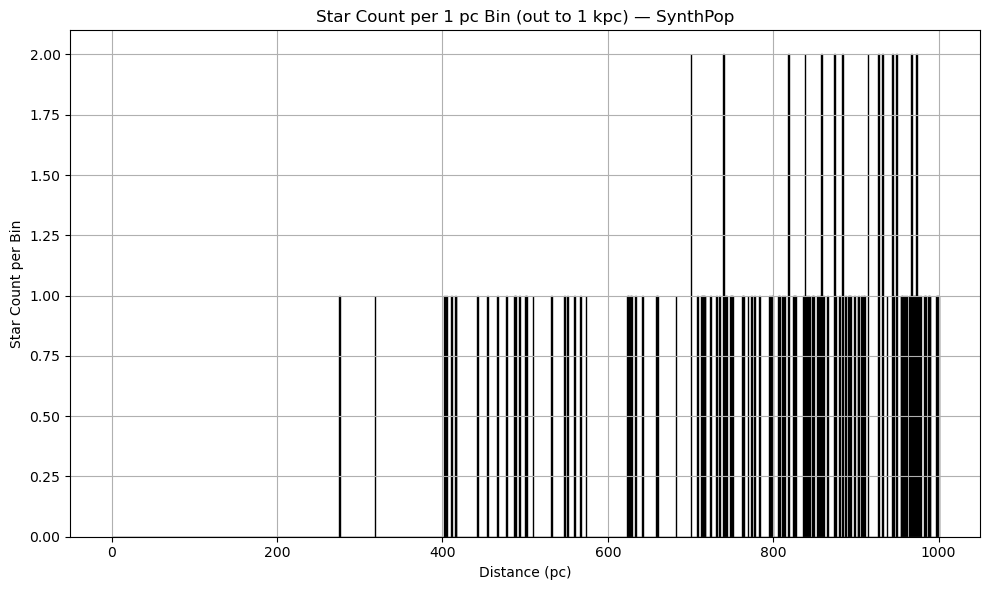

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Extract distance and population columns
distances = region_2synth['Dist_pc']

# Define bin edges: 0 to 1000 pc in 1 pc steps
bins = np.arange(0, 1001, 1)  # 1 pc bins from 0 to 1000

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=bins, color='skyblue', edgecolor='black')
plt.xlabel("Distance (pc)")
plt.ylabel("Star Count per Bin")
plt.title("Star Count per 1 pc Bin (out to 1 kpc) — SynthPop")
plt.grid(True)
plt.tight_layout()
plt.show()

# CMD

/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/4110088200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2synth['bp_rp'] = region_2synth['Gaia_BP_EDR3'] - region_2synth['Gaia_RP_EDR3']
/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/4110088200.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_2synth['abs_g_mag'] = region_2synth['Gaia_G_EDR3'] - 5 * np.log10(region_2synth['Dist_pc']) + 5


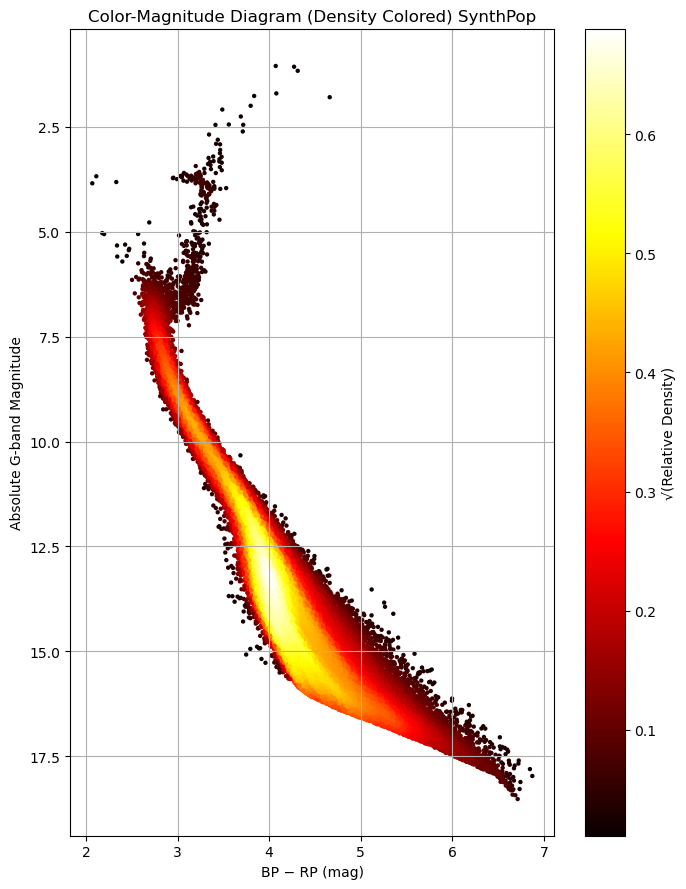

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize

# Step 1: Compute color and absolute G magnitude
region_2synth['bp_rp'] = region_2synth['Gaia_BP_EDR3'] - region_2synth['Gaia_RP_EDR3']
region_2synth['abs_g_mag'] = region_2synth['Gaia_G_EDR3'] - 5 * np.log10(region_2synth['Dist_pc']) + 5

# Step 2: Drop NaNs
cmd_data = region_2synth.dropna(subset=['bp_rp', 'abs_g_mag', 'pop'])

# Step 3: Extract coordinates and weights
x = cmd_data['bp_rp'].values
y = cmd_data['abs_g_mag'].values

# Step 4: Weighted density estimation
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)
sqrt_density = np.sqrt(density)

# Step 5: Create a consistent normalization and colormap
norm = Normalize(sqrt_density.min(), sqrt_density.max())
cmap = plt.cm.hot

# Step 6: Plot CMD
plt.figure(figsize=(7, 9))
# Use the same normalization and colormap for the scatter plot
scatter_2 = plt.scatter(x, y, c=sqrt_density, cmap=cmap, norm=norm, s=10, edgecolor='none')
plt.gca().invert_yaxis()
plt.xlabel('BP − RP (mag)')
plt.ylabel('Absolute G-band Magnitude')
plt.title('Color-Magnitude Diagram (Density Colored) SynthPop')

# Create a colorbar using the scatter plot as the mappable
cbar = plt.colorbar(scatter_2, label='√(Relative Density)')

plt.grid(True)
plt.tight_layout()
plt.show()

# Row 5,000

In [108]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [109]:
region_3synth = get_synthpop_catalog_from_ra_dec(6.639102, -41.840455, 6.4)
# Display both the catalog and its length on one line
region_3synth



################################ Settings #################################
 73370525 - # reading default parameters from
 73370528 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 73370531 - # read configuration from 
 73370532 - config_file = 'huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 73370534 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 1915269333,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "amp_wa

0.00893608577021097




# Population 1;  halo -----------------------------------------------------
 73371242 - # Initialize Population 1 (halo) from 
 73371242 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 73371820 - # Initialize Population 2 (nsd) from 
 73371821 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 73372851 - # Initialize Population 3 (thick_disk) from 
 73372852 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 73373424 - # Initialize Population 4 (thin_disk_1) from 
 73373424 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thin_disk_1.popjson'


# Population 5;  thin_disk_2 ----------------------------------------------
 73373997 - # Initialize P

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,phase,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag
0,1.0,0.096374,14.000000,-1.421728,0.096374,0.0,1.528018,6.646948,-41.819473,-8.365603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1.0,0.822617,14.000000,-1.236038,0.483665,1.0,4.456755,6.608550,-41.800852,69.940073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1.0,6.049488,14.000000,-1.659945,1.053394,1.0,5.442132,6.582408,-41.814172,-28.002322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1.0,0.386387,14.000000,-2.201872,0.386369,0.0,5.524950,6.573921,-41.857356,-199.936250,...,0.0,24.281581,23.715717,22.622184,21.956197,21.345935,22.245345,22.874443,21.482391,0.0
4,1.0,2.029063,14.000000,-1.386835,0.615168,1.0,6.622128,6.593495,-41.811050,33.631530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,10.0,0.235824,8.054845,0.013829,0.235821,0.0,0.781744,6.659391,-41.806424,-1.941439,...,0.0,24.306342,23.240250,21.803956,20.654981,19.242902,20.662857,22.050042,19.508059,0.0
108,10.0,1.192268,8.377314,-0.136407,0.523957,1.0,0.779270,6.626513,-41.844831,40.204598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
109,10.0,0.097865,8.546104,-0.162634,0.097865,0.0,0.989837,6.622408,-41.833478,-11.233333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
110,10.0,7.970631,8.609557,-0.375239,1.262799,1.0,1.129645,6.602587,-41.869039,13.388948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [110]:
region_3synth["Dist_pc"] = region_3synth["Dist"] * 1000
region_3synth = region_3synth[region_3synth['Gaia_G_EDR3'].notnull() &
        region_3synth['Gaia_BP_EDR3'].notnull() & 
        region_3synth['Gaia_RP_EDR3'].notnull()]
region_3synth

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
3,1.0,0.386387,14.000000,-2.201872,0.386369,0.0,5.524950,6.573921,-41.857356,-199.936250,...,24.281581,23.715717,22.622184,21.956197,21.345935,22.245345,22.874443,21.482391,0.0,5524.949684
6,1.0,0.677882,14.000000,-1.345420,0.677675,0.0,7.877426,6.666032,-41.881476,47.868333,...,20.233654,20.480188,19.971092,19.634122,19.294862,19.838695,20.121757,19.389292,0.0,7877.426319
8,1.0,0.117470,14.000000,-1.237973,0.117468,0.0,8.198925,6.587527,-41.867750,23.394317,...,30.909278,29.116899,27.461405,26.374755,25.344635,26.563161,27.693393,25.546994,0.0,8198.924695
9,1.0,0.395028,14.000000,-1.898410,0.395009,0.0,8.173698,6.602588,-41.813517,104.612447,...,25.284978,24.624508,23.500298,22.808369,22.187148,23.101394,23.750941,22.324825,0.0,8173.698310
10,1.0,0.389574,14.000000,-2.305710,0.389555,0.0,8.773656,6.660302,-41.791322,58.654064,...,25.147918,24.630808,23.555851,22.904257,22.301757,23.191716,23.808270,22.437247,0.0,8773.656147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,10.0,0.138209,7.806899,-0.376250,0.138208,0.0,0.514917,6.609605,-41.887397,8.189593,...,24.607211,23.209876,21.617456,20.498083,19.233902,20.594847,21.860487,19.488660,0.0,514.916525
105,10.0,0.342818,9.094146,-0.415634,0.342811,0.0,0.659311,6.622866,-41.855701,10.224993,...,22.018221,20.842542,19.410360,18.474874,17.583572,18.726548,19.656003,17.775795,0.0,659.311189
106,10.0,0.194264,7.336088,-0.422978,0.194262,0.0,0.604078,6.692584,-41.871758,-9.101187,...,23.347468,22.095115,20.597864,19.604304,18.599752,19.815772,20.843138,18.813923,0.0,604.078333
107,10.0,0.235824,8.054845,0.013829,0.235821,0.0,0.781744,6.659391,-41.806424,-1.941439,...,24.306342,23.240250,21.803956,20.654981,19.242902,20.662857,22.050042,19.508059,0.0,781.744098


# Histogram

In [111]:
x_3 = region_3synth[region_3synth['Dist_pc'] <= 1000]  # keep only rows within 1 kpc
x_3

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
49,3.0,0.105439,12.000000,-0.634822,0.105438,0.0,0.569222,6.632107,-41.855922,81.811099,...,25.899159,24.237263,22.524817,21.354590,20.084679,21.454182,22.762029,20.337454,0.0,569.221843
50,3.0,0.323808,12.000000,-0.392911,0.323801,0.0,0.671586,6.658083,-41.855110,-20.070520,...,22.215304,21.034482,19.596895,18.652975,17.738572,18.896238,19.842513,17.935749,0.0,671.586159
51,3.0,0.423025,12.000000,-0.878966,0.423008,0.0,0.771216,6.621210,-41.873046,-94.558852,...,20.912850,19.922396,18.627532,17.809325,17.114008,18.111924,18.874488,17.262793,0.0,771.215514
52,3.0,0.218263,12.000000,-0.778755,0.218258,0.0,0.842993,6.652133,-41.791555,38.466080,...,23.272037,22.089058,20.631040,19.701061,18.877987,19.980631,20.876688,19.052445,0.0,842.993059
53,3.0,0.267776,12.000000,-0.679539,0.267770,0.0,0.992842,6.654827,-41.792210,-5.513589,...,23.211738,22.043028,20.601733,19.677610,18.849803,19.953910,20.847533,19.025990,0.0,992.841601
92,9.0,0.244514,5.162312,0.193839,0.244513,0.0,0.385315,6.695796,-41.858730,30.998368,...,23.653327,22.722996,21.304698,19.907506,18.214223,19.726394,21.543577,18.461365,0.0,385.315167
93,9.0,0.355263,5.303511,-0.226547,0.355259,0.0,0.492092,6.621501,-41.845535,5.963613,...,21.516536,20.348252,18.921494,17.962204,16.978671,18.177135,19.166952,17.191099,0.0,492.091699
94,9.0,1.031927,6.204977,-0.149425,1.031536,0.0,0.486709,6.654311,-41.865747,40.263261,...,12.864977,12.914087,12.390471,12.072639,11.775273,12.283397,12.551106,11.861227,0.0,486.708910
97,10.0,0.108922,8.023778,-0.236120,0.108921,0.0,0.218273,6.626067,-41.887253,25.892738,...,24.399453,22.926441,21.274034,19.921884,18.264913,19.798903,21.512505,18.552171,0.0,218.272995
98,10.0,0.387509,8.044816,-0.672594,0.387501,0.0,0.339628,6.663204,-41.813197,0.382737,...,19.878013,18.771051,17.387578,16.505232,15.735188,16.795444,17.633928,15.899539,0.0,339.628276


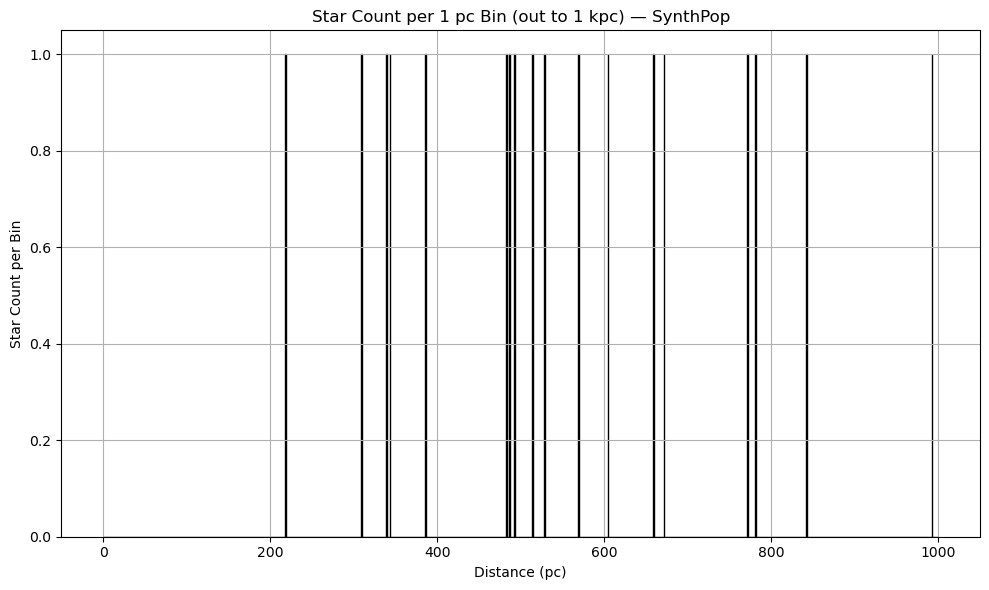

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Extract distance and population columns
distances = region_3synth['Dist_pc']

# Define bin edges: 0 to 1000 pc in 1 pc steps
bins = np.arange(0, 1001, 1)  # 1 pc bins from 0 to 1000

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=bins, color='skyblue', edgecolor='black')
plt.xlabel("Distance (pc)")
plt.ylabel("Star Count per Bin")
plt.title("Star Count per 1 pc Bin (out to 1 kpc) — SynthPop")
plt.grid(True)
plt.tight_layout()
plt.show()

# CMD

/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/1317536299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_3synth['bp_rp'] = region_3synth['Gaia_BP_EDR3'] - region_3synth['Gaia_RP_EDR3']
/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/1317536299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_3synth['abs_g_mag'] = region_3synth['Gaia_G_EDR3'] - 5 * np.log10(region_3synth['Dist_pc']) + 5


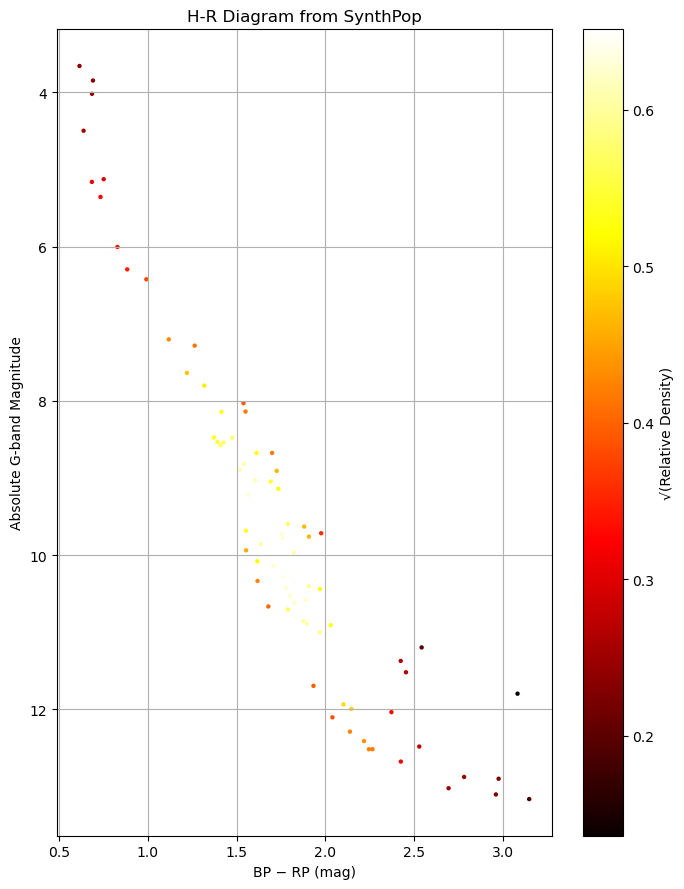

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize

# Step 1: Compute color and absolute G magnitude
region_3synth['bp_rp'] = region_3synth['Gaia_BP_EDR3'] - region_3synth['Gaia_RP_EDR3']
region_3synth['abs_g_mag'] = region_3synth['Gaia_G_EDR3'] - 5 * np.log10(region_3synth['Dist_pc']) + 5

# Step 2: Drop NaNs
cmd_data = region_3synth.dropna(subset=['bp_rp', 'abs_g_mag', 'pop'])

# Step 3: Extract coordinates and weights
x = cmd_data['bp_rp'].values
y = cmd_data['abs_g_mag'].values

# Step 4: Weighted density estimation
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)
sqrt_density = np.sqrt(density)

# Step 5: Create a consistent normalization and colormap
norm = Normalize(sqrt_density.min(), sqrt_density.max())
cmap = plt.cm.hot

# Step 6: Plot CMD
plt.figure(figsize=(7, 9))
# Use the same normalization and colormap for the scatter plot
scatter_3 = plt.scatter(x, y, c=sqrt_density, cmap=cmap, norm=norm, s=10, edgecolor='none')
plt.gca().invert_yaxis()
plt.xlabel('BP − RP (mag)')
plt.ylabel('Absolute G-band Magnitude')
plt.title('H-R Diagram from SynthPop')

# Create a colorbar using the scatter plot as the mappable
cbar = plt.colorbar(scatter_3, label='√(Relative Density)')

plt.grid(True)
plt.tight_layout()
plt.show()

# Row 50,000

In [114]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [115]:
region_4synth = get_synthpop_catalog_from_ra_dec(337.162703, 18.968371, 8.4)
# Display both the catalog and its length on one line
region_4synth



################################ Settings #################################
 73427916 - # reading default parameters from
 73427920 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 73427924 - # read configuration from 
 73427925 - config_file = 'huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 73427927 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 648601865,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "amp_war

0.015393804002589988




# Population 1;  halo -----------------------------------------------------
 73428633 - # Initialize Population 1 (halo) from 
 73428633 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 73429222 - # Initialize Population 2 (nsd) from 
 73429222 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 73430200 - # Initialize Population 3 (thick_disk) from 
 73430200 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 73430780 - # Initialize Population 4 (thin_disk_1) from 
 73430780 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thin_disk_1.popjson'


# Population 5;  thin_disk_2 ----------------------------------------------
 73431351 - # Initialize P

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,phase,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag
0,0.0,0.675029,10.000000,0.100486,0.674981,0.0,3.952623,337.201679,18.960526,88.845656,...,0.0,23.387064,22.212718,20.905927,20.108746,19.415631,20.402783,21.160364,19.558324,0.0
1,0.0,0.080247,10.000000,0.019718,0.080247,0.0,4.301302,337.181898,18.964724,285.323233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,0.0,20.610048,10.000000,0.356688,1.344827,1.0,4.577217,337.155908,18.938067,96.943186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,0.0,0.156919,10.000000,0.329382,0.156918,0.0,4.700686,337.094373,18.982831,132.626785,...,0.0,32.779099,31.804447,30.127785,28.038434,25.855812,27.477049,30.341618,25.969957,0.0
4,0.0,0.591248,10.000000,-0.002267,0.591218,0.0,4.957255,337.103758,19.004770,62.846750,...,0.0,24.886258,23.623044,22.201173,21.309133,20.503724,21.589422,22.457084,20.668167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,10.0,0.156396,7.589800,-0.459947,0.156394,0.0,2.874304,337.145922,18.927950,2.896623,...,0.0,27.996375,26.578808,24.912092,23.815356,22.666436,23.985277,25.168185,22.894622,0.0
526,10.0,0.243471,8.943066,0.098460,0.243468,0.0,2.809941,337.097552,18.980209,-8.463099,...,0.0,28.010058,26.923857,25.372588,24.037096,22.424765,23.941267,25.626766,22.677656,0.0
527,10.0,0.549980,8.883750,-0.216601,0.549957,0.0,3.090203,337.166093,18.994123,-20.262159,...,0.0,23.891210,22.688896,21.279490,20.399986,19.622954,20.686440,21.536050,19.778425,0.0
528,10.0,0.158715,9.152142,-0.167734,0.158713,0.0,3.569305,337.147739,18.909629,-42.299604,...,0.0,28.978300,27.667068,26.035563,24.827088,23.388663,24.849388,26.291701,23.653300,0.0


In [116]:
region_4synth["Dist_pc"] = region_4synth["Dist"] * 1000
region_4synth = region_4synth[region_4synth['Gaia_G_EDR3'].notnull() &
        region_4synth['Gaia_BP_EDR3'].notnull() & 
        region_4synth['Gaia_RP_EDR3'].notnull()]
region_4synth

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
0,0.0,0.675029,10.000000,0.100486,0.674981,0.0,3.952623,337.201679,18.960526,88.845656,...,23.387064,22.212718,20.905927,20.108746,19.415631,20.402783,21.160364,19.558324,0.0,3952.623396
3,0.0,0.156919,10.000000,0.329382,0.156918,0.0,4.700686,337.094373,18.982831,132.626785,...,32.779099,31.804447,30.127785,28.038434,25.855812,27.477049,30.341618,25.969957,0.0,4700.686302
4,0.0,0.591248,10.000000,-0.002267,0.591218,0.0,4.957255,337.103758,19.004770,62.846750,...,24.886258,23.623044,22.201173,21.309133,20.503724,21.589422,22.457084,20.668167,0.0,4957.254721
5,1.0,0.145322,14.000000,-0.527785,0.145319,0.0,1.856859,337.199251,19.008032,-106.293049,...,27.295772,25.827863,24.128745,23.021521,21.875464,23.195921,24.385072,22.102172,0.0,1856.858838
7,1.0,0.350445,14.000000,-2.254547,0.350430,0.0,4.026964,337.186246,18.979891,154.803141,...,24.472845,23.778769,22.534294,21.783830,21.086780,22.062064,22.799796,21.225870,0.0,4026.963678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,10.0,0.156396,7.589800,-0.459947,0.156394,0.0,2.874304,337.145922,18.927950,2.896623,...,27.996375,26.578808,24.912092,23.815356,22.666436,23.985277,25.168185,22.894622,0.0,2874.304249
526,10.0,0.243471,8.943066,0.098460,0.243468,0.0,2.809941,337.097552,18.980209,-8.463099,...,28.010058,26.923857,25.372588,24.037096,22.424765,23.941267,25.626766,22.677656,0.0,2809.940958
527,10.0,0.549980,8.883750,-0.216601,0.549957,0.0,3.090203,337.166093,18.994123,-20.262159,...,23.891210,22.688896,21.279490,20.399986,19.622954,20.686440,21.536050,19.778425,0.0,3090.203031
528,10.0,0.158715,9.152142,-0.167734,0.158713,0.0,3.569305,337.147739,18.909629,-42.299604,...,28.978300,27.667068,26.035563,24.827088,23.388663,24.849388,26.291701,23.653300,0.0,3569.305119


# Histogram

In [117]:
x_4 = region_4synth[region_4synth['Dist_pc'] <= 1000]  # keep only rows within 1 kpc
x_4

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
70,3.0,0.148904,12.000000,-0.572781,0.148902,0.0,0.232408,337.196986,18.965792,43.994680,...,22.562104,21.122024,19.441144,18.352730,17.252690,18.544892,19.697209,17.470634,0.0,232.408431
71,3.0,0.382128,12.000000,-0.997341,0.382115,0.0,0.578570,337.160434,18.904607,-154.099405,...,21.128890,20.050506,18.618818,17.725125,16.948847,18.014823,18.877044,17.100234,0.0,578.569715
73,3.0,0.154152,12.000000,-1.193272,0.154149,0.0,0.721174,337.212444,18.992338,5.965105,...,24.440356,22.980018,21.361764,20.334837,19.383415,20.564492,21.614287,19.563146,0.0,721.173757
75,3.0,0.235572,12.000000,-0.635436,0.235567,0.0,0.950120,337.208583,19.021706,7.552146,...,24.013380,22.734772,21.151102,20.147343,19.213513,20.399989,21.409307,19.397205,0.0,950.119994
76,3.0,0.105031,12.000000,-0.589192,0.105030,0.0,0.963514,337.219347,18.961008,-58.716186,...,27.645486,25.902533,24.073010,22.824653,21.438907,22.888113,24.321199,21.699153,0.0,963.513669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,10.0,0.257450,9.761516,-0.307969,0.257446,0.0,0.979823,337.145109,19.015799,9.555457,...,24.241475,22.964113,21.386348,20.345172,19.262288,20.538028,21.644029,19.479729,0.0,979.822545
449,10.0,0.459130,7.734406,-0.379931,0.459118,0.0,0.922635,337.160057,18.956325,-77.292779,...,22.135634,20.929376,19.448577,18.511841,17.654859,18.781234,19.706354,17.825912,0.0,922.634787
450,10.0,0.227669,8.267906,-0.613857,0.227666,0.0,0.960957,337.215690,18.973704,-2.294640,...,24.155568,22.869504,21.284286,20.277513,19.334210,20.526692,21.541839,19.520842,0.0,960.956952
452,10.0,0.185801,7.408671,-0.446711,0.185799,0.0,0.985591,337.210671,18.975822,-43.440722,...,25.061453,23.710225,22.081749,21.021014,19.940549,21.218609,22.339092,20.156085,0.0,985.591458


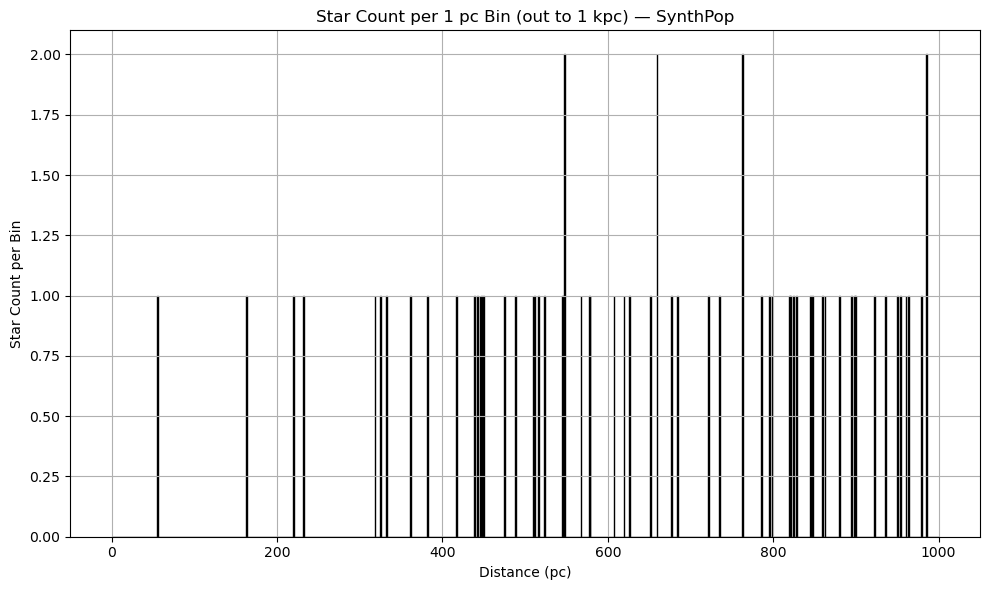

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Extract distance and population columns
distances = region_4synth['Dist_pc']

# Define bin edges: 0 to 1000 pc in 1 pc steps
bins = np.arange(0, 1001, 1)  # 1 pc bins from 0 to 1000

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=bins, color='skyblue', edgecolor='black')
plt.xlabel("Distance (pc)")
plt.ylabel("Star Count per Bin")
plt.title("Star Count per 1 pc Bin (out to 1 kpc) — SynthPop")
plt.grid(True)
plt.tight_layout()
plt.show()

# CMD

/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/1927629583.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_4synth['bp_rp'] = region_4synth['Gaia_BP_EDR3'] - region_4synth['Gaia_RP_EDR3']
/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/1927629583.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_4synth['abs_g_mag'] = region_4synth['Gaia_G_EDR3'] - 5 * np.log10(region_4synth['Dist_pc']) + 5


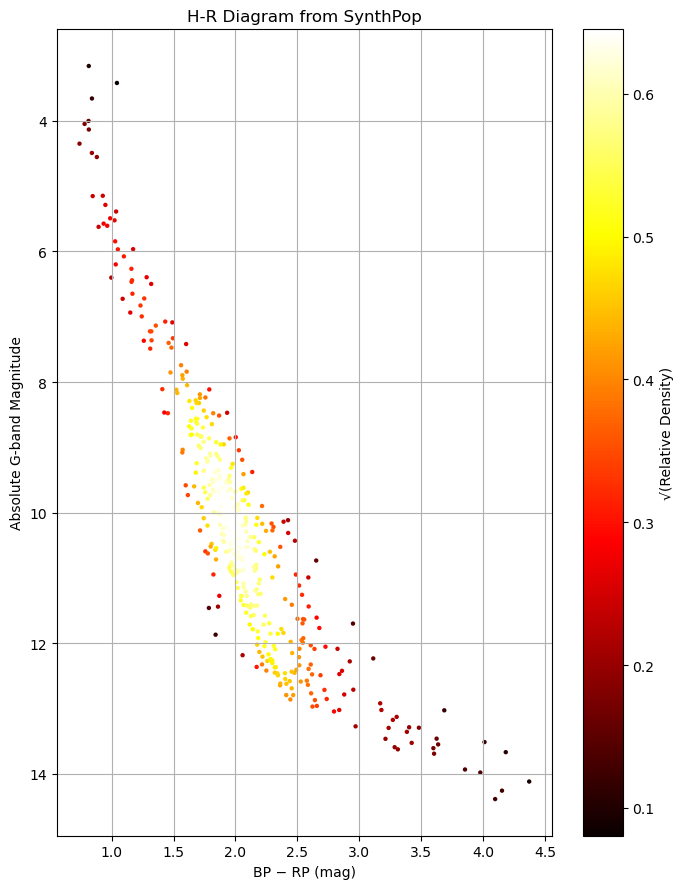

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize

# Step 1: Compute color and absolute G magnitude
region_4synth['bp_rp'] = region_4synth['Gaia_BP_EDR3'] - region_4synth['Gaia_RP_EDR3']
region_4synth['abs_g_mag'] = region_4synth['Gaia_G_EDR3'] - 5 * np.log10(region_4synth['Dist_pc']) + 5

# Step 2: Drop NaNs
cmd_data = region_4synth.dropna(subset=['bp_rp', 'abs_g_mag', 'pop'])

# Step 3: Extract coordinates and weights
x = cmd_data['bp_rp'].values
y = cmd_data['abs_g_mag'].values

# Step 4: Weighted density estimation
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)
sqrt_density = np.sqrt(density)

# Step 5: Create a consistent normalization and colormap
norm = Normalize(sqrt_density.min(), sqrt_density.max())
cmap = plt.cm.hot

# Step 6: Plot CMD
plt.figure(figsize=(7, 9))
# Use the same normalization and colormap for the scatter plot
scatter_4 = plt.scatter(x, y, c=sqrt_density, cmap=cmap, norm=norm, s=10, edgecolor='none')
plt.gca().invert_yaxis()
plt.xlabel('BP − RP (mag)')
plt.ylabel('Absolute G-band Magnitude')
plt.title('H-R Diagram from SynthPop')

# Create a colorbar using the scatter plot as the mappable
cbar = plt.colorbar(scatter_4, label='√(Relative Density)')

plt.grid(True)
plt.tight_layout()
plt.show()

# Row 100,000

In [120]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [121]:
region_5synth = get_synthpop_catalog_from_ra_dec(104.347052, -24.647317, 6.4)
# Display both the catalog and its length on one line
region_5synth



################################ Settings #################################
 73458930 - # reading default parameters from
 73458932 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 73458935 - # read configuration from 
 73458936 - config_file = 'huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 73458937 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 1473727491,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "amp_wa

0.00893608577021097




# Population 1;  halo -----------------------------------------------------
 73459832 - # Initialize Population 1 (halo) from 
 73459833 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 73460415 - # Initialize Population 2 (nsd) from 
 73460416 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 73461391 - # Initialize Population 3 (thick_disk) from 
 73461391 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 73461973 - # Initialize Population 4 (thin_disk_1) from 
 73461973 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thin_disk_1.popjson'


# Population 5;  thin_disk_2 ----------------------------------------------
 73462552 - # Initialize P

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,phase,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag
0,1.0,0.090775,14.000000,-2.368025,0.090775,0.0,4.579852,104.378189,-24.627691,-35.917700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1.0,0.171472,14.000000,-1.939722,0.171468,0.0,4.792621,104.393205,-24.622594,113.271583,...,0.0,28.640043,27.339949,25.577855,24.515259,23.522226,24.755452,25.870864,23.677705,0.0
2,1.0,0.186194,14.000000,-1.584386,0.186189,0.0,5.420146,104.337266,-24.630612,279.681551,...,0.0,28.947316,27.582240,25.775946,24.683881,23.669329,24.921958,26.067676,23.827341,0.0
3,1.0,0.558037,14.000000,-1.780318,0.557966,0.0,5.872484,104.391437,-24.673622,341.938004,...,0.0,23.441073,23.129518,21.925490,21.235675,20.516158,21.438089,22.182120,20.630853,0.0
4,1.0,0.105200,14.000000,-2.970503,0.105199,0.0,5.922467,104.341856,-24.686356,113.296230,...,0.0,30.405803,29.173292,27.342269,26.277329,25.251458,26.511279,27.657643,25.408463,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5472,10.0,0.317494,9.388173,-0.284319,0.317488,0.0,23.430492,104.289056,-24.641457,220.755671,...,0.0,32.024068,30.541918,28.654340,27.459941,26.209729,27.627490,28.945538,26.423129,0.0
5473,10.0,0.381506,8.618100,-0.473508,0.381498,0.0,23.637573,104.316049,-24.672509,201.177592,...,0.0,31.286006,29.830300,27.970077,26.826025,25.721759,27.046878,28.261462,25.903136,0.0
5474,10.0,0.390669,9.700703,-0.384979,0.390660,0.0,23.715852,104.387986,-24.666431,214.037644,...,0.0,31.266459,29.813597,27.963198,26.816513,25.687505,27.027032,28.253597,25.876050,0.0
5475,10.0,1.364741,9.510600,-0.216290,0.542757,1.0,23.971957,104.358153,-24.687391,202.992916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [122]:
region_5synth["Dist_pc"] = region_5synth["Dist"] * 1000
region_5synth = region_5synth[region_5synth['Gaia_G_EDR3'].notnull() &
        region_5synth['Gaia_BP_EDR3'].notnull() & 
        region_5synth['Gaia_RP_EDR3'].notnull()]
region_5synth

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
1,1.0,0.171472,14.000000,-1.939722,0.171468,0.0,4.792621,104.393205,-24.622594,113.271583,...,28.640043,27.339949,25.577855,24.515259,23.522226,24.755452,25.870864,23.677705,0.0,4792.621397
2,1.0,0.186194,14.000000,-1.584386,0.186189,0.0,5.420146,104.337266,-24.630612,279.681551,...,28.947316,27.582240,25.775946,24.683881,23.669329,24.921958,26.067676,23.827341,0.0,5420.145730
3,1.0,0.558037,14.000000,-1.780318,0.557966,0.0,5.872484,104.391437,-24.673622,341.938004,...,23.441073,23.129518,21.925490,21.235675,20.516158,21.438089,22.182120,20.630853,0.0,5872.483916
4,1.0,0.105200,14.000000,-2.970503,0.105199,0.0,5.922467,104.341856,-24.686356,113.296230,...,30.405803,29.173292,27.342269,26.277329,25.251458,26.511279,27.657643,25.408463,0.0,5922.466540
5,1.0,0.502509,14.000000,-1.119658,0.502469,0.0,8.296009,104.391596,-24.614757,57.003034,...,26.119625,25.182526,23.705775,22.841386,22.014501,23.085259,23.990910,22.144625,0.0,8296.009486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471,10.0,0.163145,9.978216,-0.773475,0.163143,0.0,23.394678,104.379177,-24.643547,211.312306,...,33.354988,31.771944,29.808132,28.599604,27.432420,28.804031,30.097331,27.624249,0.0,23394.677789
5472,10.0,0.317494,9.388173,-0.284319,0.317488,0.0,23.430492,104.289056,-24.641457,220.755671,...,32.024068,30.541918,28.654340,27.459941,26.209729,27.627490,28.945538,26.423129,0.0,23430.491966
5473,10.0,0.381506,8.618100,-0.473508,0.381498,0.0,23.637573,104.316049,-24.672509,201.177592,...,31.286006,29.830300,27.970077,26.826025,25.721759,27.046878,28.261462,25.903136,0.0,23637.573478
5474,10.0,0.390669,9.700703,-0.384979,0.390660,0.0,23.715852,104.387986,-24.666431,214.037644,...,31.266459,29.813597,27.963198,26.816513,25.687505,27.027032,28.253597,25.876050,0.0,23715.852087


# Histogram

In [123]:
x_5 = region_5synth[region_5synth['Dist_pc'] <= 1000]  # keep only rows within 1 kpc
x_5

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
35,3.0,0.133591,12.000000,-0.620376,0.133589,0.0,0.677539,104.366742,-24.650497,118.713007,...,26.875884,25.124963,23.071206,21.772911,20.406309,21.898476,23.358142,20.636468,0.0,677.539208
37,3.0,0.299452,12.000000,-0.910276,0.299444,0.0,0.654408,104.353358,-24.667567,88.140497,...,23.662834,22.275379,20.436090,19.318905,18.287289,19.563074,20.727886,18.450688,0.0,654.407752
38,3.0,0.126937,12.000000,-0.359303,0.126935,0.0,0.707876,104.389968,-24.673117,45.063230,...,27.705259,25.961796,23.901089,22.497080,20.864181,22.492065,24.187287,21.132719,0.0,707.875997
39,3.0,0.223490,12.000000,-1.266532,0.223484,0.0,0.868073,104.331278,-24.691871,301.861558,...,24.810724,23.378930,21.550072,20.436743,19.388561,20.661008,21.840215,19.552275,0.0,868.073482
447,4.0,0.663093,0.010878,0.004936,0.663092,0.0,0.301435,104.318742,-24.661788,27.498098,...,19.699054,18.185689,16.392197,15.263851,14.082509,15.448397,16.684243,14.285901,0.0,301.435150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,10.0,0.470512,7.617608,-0.260600,0.470501,0.0,0.902308,104.369091,-24.678090,83.346891,...,23.523683,22.075857,20.261268,19.144483,18.061785,19.368683,20.551759,18.241798,0.0,902.308159
2997,10.0,0.154647,9.134150,-0.568994,0.154645,0.0,0.952059,104.334865,-24.696169,6.621742,...,26.878084,25.236667,23.237756,21.987601,20.703969,22.148810,23.527654,20.920671,0.0,952.059111
2998,10.0,0.313511,9.193422,-0.200859,0.313505,0.0,0.950052,104.382451,-24.671497,22.970616,...,25.179376,23.724285,21.852373,20.640691,19.325999,20.778378,22.142811,19.551481,0.0,950.051943
3000,10.0,0.963980,7.632639,0.097995,0.963751,0.0,0.963624,104.357316,-24.612729,24.424487,...,17.487224,17.015154,15.878874,15.257785,14.642344,15.458244,16.125224,14.739098,0.0,963.624070


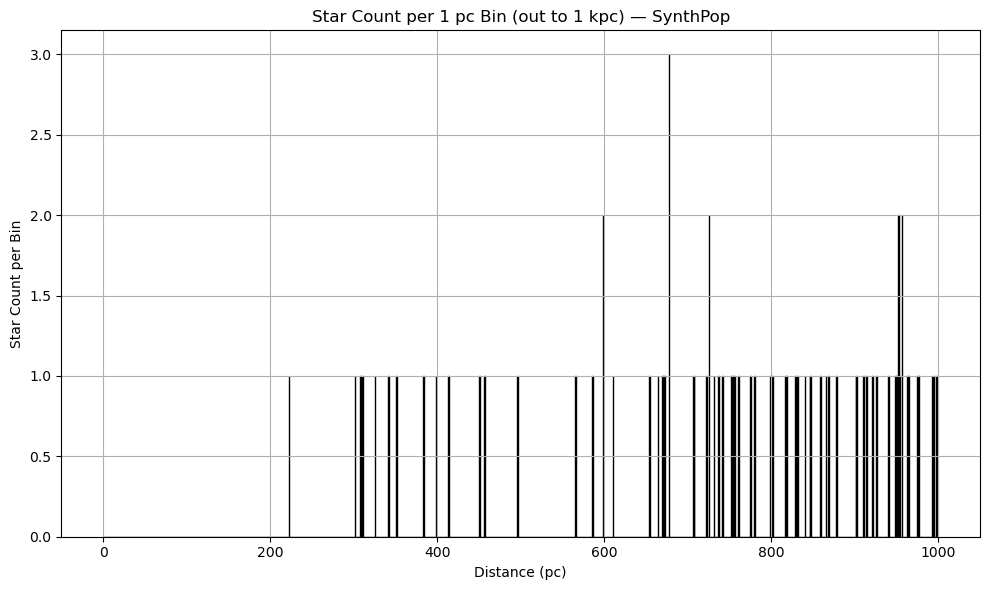

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Extract distance and population columns
distances = region_5synth['Dist_pc']

# Define bin edges: 0 to 1000 pc in 1 pc steps
bins = np.arange(0, 1001, 1)  # 1 pc bins from 0 to 1000

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=bins, color='skyblue', edgecolor='black')
plt.xlabel("Distance (pc)")
plt.ylabel("Star Count per Bin")
plt.title("Star Count per 1 pc Bin (out to 1 kpc) — SynthPop")
plt.grid(True)
plt.tight_layout()
plt.show()

# CMD

/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/1105020671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_5synth['bp_rp'] = region_5synth['Gaia_BP_EDR3'] - region_5synth['Gaia_RP_EDR3']
/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/1105020671.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_5synth['abs_g_mag'] = region_5synth['Gaia_G_EDR3'] - 5 * np.log10(region_5synth['Dist_pc']) + 5


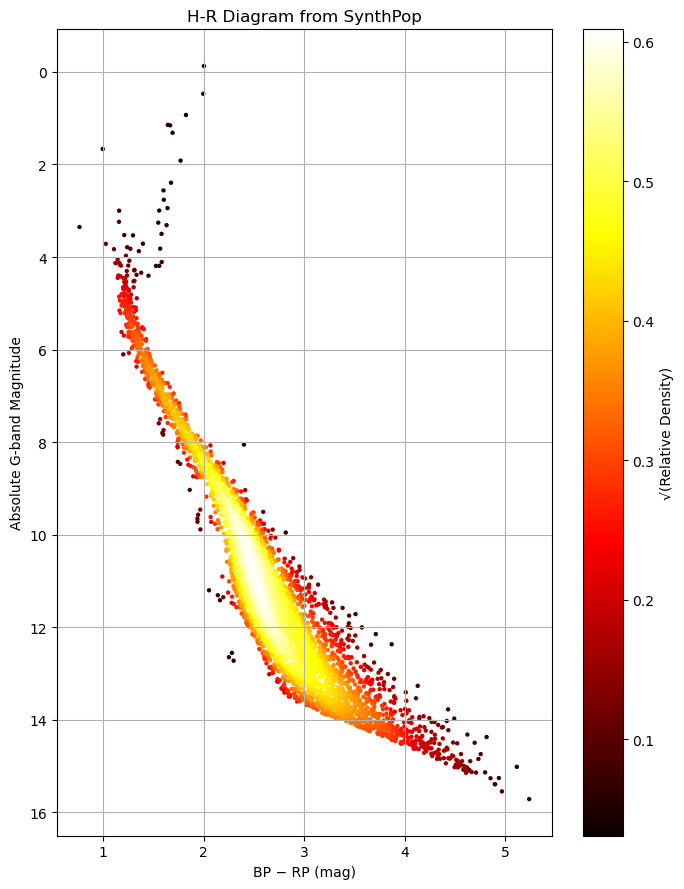

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize

# Step 1: Compute color and absolute G magnitude
region_5synth['bp_rp'] = region_5synth['Gaia_BP_EDR3'] - region_5synth['Gaia_RP_EDR3']
region_5synth['abs_g_mag'] = region_5synth['Gaia_G_EDR3'] - 5 * np.log10(region_5synth['Dist_pc']) + 5

# Step 2: Drop NaNs
cmd_data = region_5synth.dropna(subset=['bp_rp', 'abs_g_mag', 'pop'])

# Step 3: Extract coordinates and weights
x = cmd_data['bp_rp'].values
y = cmd_data['abs_g_mag'].values

# Step 4: Weighted density estimation
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)
sqrt_density = np.sqrt(density)

# Step 5: Create a consistent normalization and colormap
norm = Normalize(sqrt_density.min(), sqrt_density.max())
cmap = plt.cm.hot

# Step 6: Plot CMD
plt.figure(figsize=(7, 9))
# Use the same normalization and colormap for the scatter plot
scatter_5 = plt.scatter(x, y, c=sqrt_density, cmap=cmap, norm=norm, s=10, edgecolor='none')
plt.gca().invert_yaxis()
plt.xlabel('BP − RP (mag)')
plt.ylabel('Absolute G-band Magnitude')
plt.title('H-R Diagram from SynthPop')

# Create a colorbar using the scatter plot as the mappable
cbar = plt.colorbar(scatter_5, label='√(Relative Density)')

plt.grid(True)
plt.tight_layout()
plt.show()

# 200,000

In [126]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [127]:
region_6synth = get_synthpop_catalog_from_ra_dec(264.242801, -44.312320, 5.5)
# Display both the catalog and its length on one line
region_6synth



################################ Settings #################################
 73601397 - # reading default parameters from
 73601400 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 73601406 - # read configuration from 
 73601408 - config_file = 'huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 73601409 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 2044996983,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "amp_wa

0.006599526234103557




# Population 1;  halo -----------------------------------------------------
 73602107 - # Initialize Population 1 (halo) from 
 73602107 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 73602714 - # Initialize Population 2 (nsd) from 
 73602715 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 73603692 - # Initialize Population 3 (thick_disk) from 
 73603692 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 73604310 - # Initialize Population 4 (thin_disk_1) from 
 73604310 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thin_disk_1.popjson'


# Population 5;  thin_disk_2 ----------------------------------------------
 73604927 - # Initialize P

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,phase,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag
0,0.0,0.245417,10.000000,0.070265,0.245414,0.0,3.737934,264.273352,-44.330623,10.879414,...,0.0,31.985312,30.319297,27.930539,26.208074,24.137641,26.052333,28.271772,24.398645,0.0
1,0.0,0.601969,10.000000,0.074646,0.601939,0.0,3.894110,264.216807,-44.331070,16.163994,...,0.0,27.889305,26.083634,23.848172,22.520076,21.174394,22.690808,24.187342,21.352404,0.0
2,0.0,0.086167,10.000000,0.351131,0.086167,0.0,3.828009,264.211571,-44.335181,-103.122948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0.0,0.900701,10.000000,0.315484,0.900536,0.0,4.089888,264.302572,-44.310159,3.062359,...,0.0,24.288239,23.096231,21.209997,20.206471,19.191441,20.380106,21.548138,19.300512,0.0
4,0.0,0.096431,10.000000,0.086508,0.096431,0.0,4.262420,264.257621,-44.296585,-205.601810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52140,10.0,1.585362,9.844490,-0.462737,0.566805,1.0,24.134321,264.247599,-44.330599,20.404409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52141,10.0,0.296880,7.640655,-0.749725,0.296875,0.0,24.212061,264.245352,-44.270586,10.373070,...,0.0,34.129634,32.313596,29.884039,28.452076,27.042635,28.622453,30.232570,27.216645,0.0
52142,10.0,0.287202,8.854019,-0.313825,0.287197,0.0,24.225021,264.253453,-44.301806,30.891540,...,0.0,34.586342,32.742959,30.316230,28.839779,27.258894,28.943963,30.661521,27.475834,0.0
52143,10.0,0.146285,8.004857,-0.242191,0.146284,0.0,24.544902,264.265395,-44.285724,28.419587,...,0.0,37.145721,35.161867,32.604949,30.950583,29.002447,30.894366,32.950931,29.272846,0.0


In [128]:
region_6synth["Dist_pc"] = region_6synth["Dist"] * 1000
region_6synth = region_6synth[region_6synth['Gaia_G_EDR3'].notnull() &
        region_6synth['Gaia_BP_EDR3'].notnull() & 
        region_6synth['Gaia_RP_EDR3'].notnull()]
region_6synth

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
0,0.0,0.245417,10.000000,0.070265,0.245414,0.0,3.737934,264.273352,-44.330623,10.879414,...,31.985312,30.319297,27.930539,26.208074,24.137641,26.052333,28.271772,24.398645,0.0,3737.933888
1,0.0,0.601969,10.000000,0.074646,0.601939,0.0,3.894110,264.216807,-44.331070,16.163994,...,27.889305,26.083634,23.848172,22.520076,21.174394,22.690808,24.187342,21.352404,0.0,3894.110450
3,0.0,0.900701,10.000000,0.315484,0.900536,0.0,4.089888,264.302572,-44.310159,3.062359,...,24.288239,23.096231,21.209997,20.206471,19.191441,20.380106,21.548138,19.300512,0.0,4089.887952
5,0.0,0.298037,10.000000,-0.422953,0.298032,0.0,4.217228,264.199999,-44.336226,-53.627041,...,30.353149,28.542229,26.164981,24.732714,23.249996,24.869757,26.505641,23.451446,0.0,4217.227743
6,0.0,0.261231,10.000000,-0.339931,0.261226,0.0,4.328728,264.288726,-44.296661,13.663689,...,31.152578,29.284677,26.824700,25.330481,23.730913,25.430822,27.172534,23.948107,0.0,4328.728045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52139,10.0,0.226781,8.462893,-0.345115,0.226778,0.0,24.191292,264.225004,-44.302756,38.697056,...,35.124704,33.263627,30.825883,29.335840,27.729181,29.428827,31.169673,27.951624,0.0,24191.292296
52141,10.0,0.296880,7.640655,-0.749725,0.296875,0.0,24.212061,264.245352,-44.270586,10.373070,...,34.129634,32.313596,29.884039,28.452076,27.042635,28.622453,30.232570,27.216645,0.0,24212.060825
52142,10.0,0.287202,8.854019,-0.313825,0.287197,0.0,24.225021,264.253453,-44.301806,30.891540,...,34.586342,32.742959,30.316230,28.839779,27.258894,28.943963,30.661521,27.475834,0.0,24225.020502
52143,10.0,0.146285,8.004857,-0.242191,0.146284,0.0,24.544902,264.265395,-44.285724,28.419587,...,37.145721,35.161867,32.604949,30.950583,29.002447,30.894366,32.950931,29.272846,0.0,24544.901737


# Histogram

In [129]:
x_6 = region_6synth[region_6synth['Dist_pc'] <= 1000]  # keep only rows within 1 kpc
x_6

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
27772,3.0,0.103911,12.000000,-1.014689,0.103910,0.0,0.888584,264.284566,-44.299948,-36.326052,...,30.863659,28.454016,25.731651,24.088870,22.388632,24.161509,26.070207,22.615537,0.0,888.583807
27773,3.0,0.214226,12.000000,-0.348095,0.214222,0.0,0.809365,264.210620,-44.319418,-48.358644,...,27.804044,25.947761,23.521370,22.034327,20.426689,22.124679,23.863389,20.650957,0.0,809.365010
27774,3.0,0.145325,12.000000,-0.661995,0.145323,0.0,0.827188,264.276788,-44.326840,-152.854772,...,28.955312,26.939908,24.405692,22.879019,21.288414,22.983843,24.747602,21.503833,0.0,827.188218
27775,3.0,0.803680,12.000000,-0.602445,0.803324,0.0,0.978246,264.302282,-44.306692,103.460925,...,19.253529,18.717510,17.191041,16.339920,15.408224,16.434593,17.451687,15.503862,0.0,978.245776
27776,3.0,0.129820,12.000000,-0.976137,0.129818,0.0,0.984108,264.251765,-44.347847,39.769055,...,29.561551,27.477968,24.933857,23.415463,21.877863,23.538023,25.272571,22.082486,0.0,984.108006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47265,10.0,0.149423,8.794502,-0.532545,0.149421,0.0,0.912295,264.254071,-44.278685,45.475019,...,29.343691,27.307700,24.742509,23.189192,21.529347,23.271449,25.088565,21.756691,0.0,912.294896
47266,10.0,0.112614,8.936123,-0.711837,0.112613,0.0,0.949612,264.286973,-44.323986,-9.853412,...,30.690256,28.432979,25.771898,24.145330,22.392300,24.185908,26.110729,22.632801,0.0,949.611734
47267,10.0,0.158227,8.763275,-0.553154,0.158225,0.0,0.941446,264.205980,-44.324383,2.637375,...,28.907225,26.941484,24.452152,22.947094,21.362444,23.051816,24.792637,21.581931,0.0,941.445506
47268,10.0,0.187602,7.112113,-0.381996,0.187600,0.0,0.957335,264.252688,-44.303185,-14.931453,...,28.723348,26.809599,24.328199,22.807601,21.155613,22.884997,24.673035,21.384334,0.0,957.335215


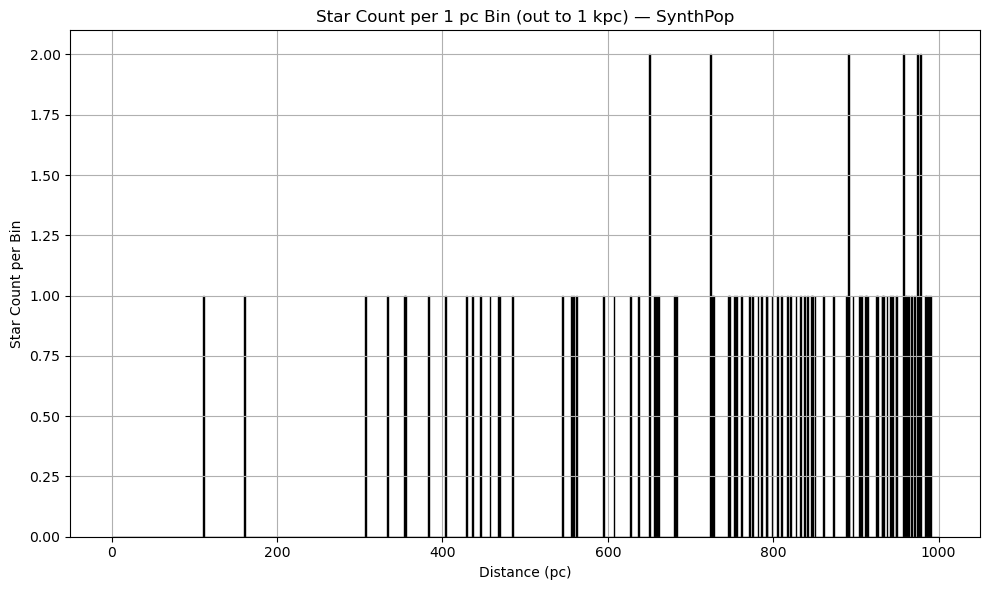

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# Extract distance and population columns
distances = region_6synth['Dist_pc']

# Define bin edges: 0 to 1000 pc in 1 pc steps
bins = np.arange(0, 1001, 1)  # 1 pc bins from 0 to 1000

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=bins, color='skyblue', edgecolor='black')
plt.xlabel("Distance (pc)")
plt.ylabel("Star Count per Bin")
plt.title("Star Count per 1 pc Bin (out to 1 kpc) — SynthPop")
plt.grid(True)
plt.tight_layout()
plt.show()

# CMD

/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/896973203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_6synth['bp_rp'] = region_6synth['Gaia_BP_EDR3'] - region_6synth['Gaia_RP_EDR3']
/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/896973203.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_6synth['abs_g_mag'] = region_6synth['Gaia_G_EDR3'] - 5 * np.log10(region_6synth['Dist_pc']) + 5


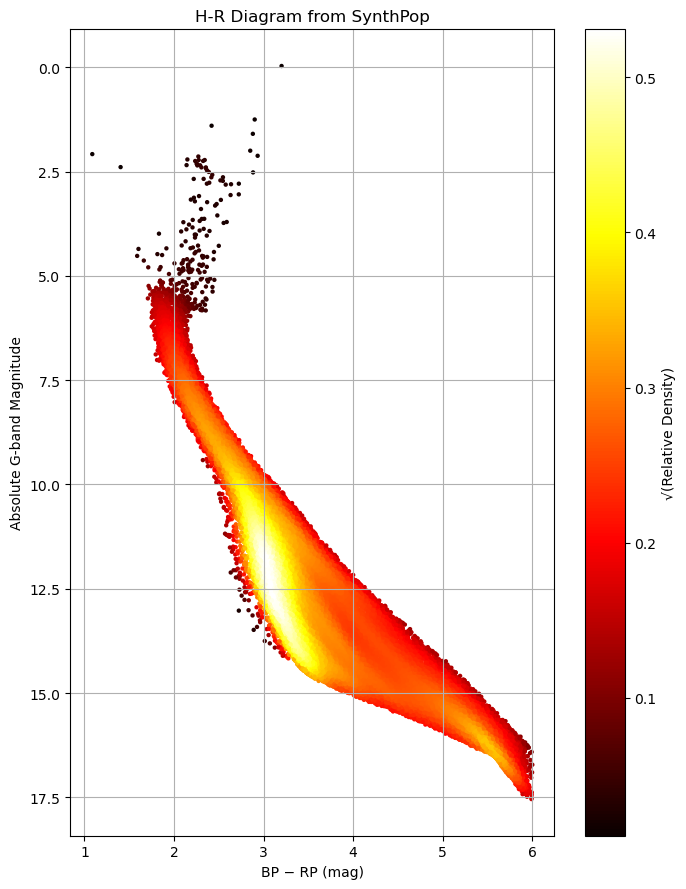

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize

# Step 1: Compute color and absolute G magnitude
region_6synth['bp_rp'] = region_6synth['Gaia_BP_EDR3'] - region_6synth['Gaia_RP_EDR3']
region_6synth['abs_g_mag'] = region_6synth['Gaia_G_EDR3'] - 5 * np.log10(region_6synth['Dist_pc']) + 5

# Step 2: Drop NaNs
cmd_data = region_6synth.dropna(subset=['bp_rp', 'abs_g_mag', 'pop'])

# Step 3: Extract coordinates and weights
x = cmd_data['bp_rp'].values
y = cmd_data['abs_g_mag'].values

# Step 4: Weighted density estimation
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)
sqrt_density = np.sqrt(density)

# Step 5: Create a consistent normalization and colormap
norm = Normalize(sqrt_density.min(), sqrt_density.max())
cmap = plt.cm.hot

# Step 6: Plot CMD
plt.figure(figsize=(7, 9))
# Use the same normalization and colormap for the scatter plot
scatter_6 = plt.scatter(x, y, c=sqrt_density, cmap=cmap, norm=norm, s=10, edgecolor='none')
plt.gca().invert_yaxis()
plt.xlabel('BP − RP (mag)')
plt.ylabel('Absolute G-band Magnitude')
plt.title('H-R Diagram from SynthPop')

# Create a colorbar using the scatter plot as the mappable
cbar = plt.colorbar(scatter_6, label='√(Relative Density)')

plt.grid(True)
plt.tight_layout()
plt.show()

# Row 300,000

In [179]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [180]:
region_7synth = get_synthpop_catalog_from_ra_dec(296.382669, 33.565181, 5.5)
# Display both the catalog and its length on one line
region_7synth



################################ Settings #################################
 438681732 - # reading default parameters from
 438681735 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 438681740 - # read configuration from 
 438681741 - config_file = 'huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 438681746 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 1659231329,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "a

0.006599526234103557




# Population 1;  halo -----------------------------------------------------
 438683116 - # Initialize Population 1 (halo) from 
 438683116 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/halo.popjson'


# Population 2;  nsd ------------------------------------------------------
 438683710 - # Initialize Population 2 (nsd) from 
 438683711 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/nsd.popjson'


# Population 3;  thick_disk -----------------------------------------------
 438684709 - # Initialize Population 3 (thick_disk) from 
 438684709 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thick_disk.popjson'


# Population 4;  thin_disk_1 ----------------------------------------------
 438685291 - # Initialize Population 4 (thin_disk_1) from 
 438685292 - pop_file = '/Users/MattLor/synthpop/synthpop/models/Huston2025/thin_disk_1.popjson'


# Population 5;  thin_disk_2 ----------------------------------------------
 438685869 - # Ini

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor,eirp_boost
0,0.0,0.458080,10.000000,0.237072,0.458069,0.0,2.919359,296.385857,33.559634,51.939887,...,23.206964,21.527421,23.218611,24.928475,21.782211,0.0,2919.358519,0.369002,0.987597,1.012558
1,0.0,1.229929,10.000000,0.312266,0.528062,1.0,3.387037,296.361341,33.583960,-5.469059,...,NaN,NaN,NaN,NaN,NaN,1.0,3387.037158,1.551232,0.802075,1.246767
2,0.0,0.259769,10.000000,-0.098472,0.259765,0.0,3.959666,296.376404,33.537223,182.214605,...,25.100777,23.419485,25.119996,26.867287,23.671452,0.0,3959.666161,1.706466,0.765746,1.305915
3,0.0,0.887614,10.000000,0.216006,0.887447,0.0,4.194471,296.400256,33.548716,47.555343,...,19.731365,18.874682,19.926770,20.897760,18.981605,0.0,4194.471185,1.322543,0.851874,1.173883
4,0.0,0.141569,10.000000,-0.287859,0.141567,0.0,4.263371,296.347735,33.532381,106.886926,...,26.684092,24.904084,26.664364,28.527309,25.171101,0.0,4263.371030,2.631459,0.530106,1.886414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39435,10.0,0.120941,8.633688,-0.681452,0.120940,0.0,24.987377,296.393640,33.532937,-212.352740,...,30.573298,28.980363,30.648240,32.381551,29.216342,0.0,24987.376547,2.010937,0.690290,1.448667
39436,10.0,0.376787,8.567752,-0.443449,0.376779,0.0,24.956684,296.366968,33.550916,-181.202910,...,27.629611,26.324699,27.809765,29.257752,26.511655,0.0,24956.683833,1.161376,0.883711,1.131591
39437,10.0,0.512800,8.791749,-0.655901,0.512778,0.0,24.930151,296.374772,33.581589,-224.201558,...,26.139830,25.059209,26.361097,27.590117,25.201392,0.0,24930.151193,1.060665,0.902024,1.108618
39438,10.0,0.143301,9.535870,-0.621609,0.143300,0.0,24.976560,296.403136,33.549801,-205.861973,...,29.945921,28.450870,30.061097,31.693440,28.672573,0.0,24976.559896,1.377970,0.840267,1.190099


In [181]:
region_7synth["Dist_pc"] = region_7synth["Dist"] * 1000
region_7synth = region_7synth[region_7synth['Gaia_G_EDR3'].notnull() &
        region_7synth['Gaia_BP_EDR3'].notnull() & 
        region_7synth['Gaia_RP_EDR3'].notnull()]
region_7synth

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor,eirp_boost
0,0.0,0.458080,10.000000,0.237072,0.458069,0.0,2.919359,296.385857,33.559634,51.939887,...,23.206964,21.527421,23.218611,24.928475,21.782211,0.0,2919.358519,0.369002,0.987597,1.012558
2,0.0,0.259769,10.000000,-0.098472,0.259765,0.0,3.959666,296.376404,33.537223,182.214605,...,25.100777,23.419485,25.119996,26.867287,23.671452,0.0,3959.666161,1.706466,0.765746,1.305915
3,0.0,0.887614,10.000000,0.216006,0.887447,0.0,4.194471,296.400256,33.548716,47.555343,...,19.731365,18.874682,19.926770,20.897760,18.981605,0.0,4194.471185,1.322543,0.851874,1.173883
4,0.0,0.141569,10.000000,-0.287859,0.141567,0.0,4.263371,296.347735,33.532381,106.886926,...,26.684092,24.904084,26.664364,28.527309,25.171101,0.0,4263.371030,2.631459,0.530106,1.886414
6,0.0,0.157580,10.000000,0.163199,0.157578,0.0,4.588524,296.395284,33.563206,-46.828233,...,28.314931,25.981064,27.897139,30.674128,26.190892,0.0,4588.523724,0.641715,0.962960,1.038465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39434,10.0,0.479740,9.364022,-0.487673,0.479723,0.0,24.967551,296.387942,33.560272,-237.821972,...,26.639242,25.470759,26.854108,28.182979,25.628715,0.0,24967.551083,0.395285,0.985781,1.014424
39435,10.0,0.120941,8.633688,-0.681452,0.120940,0.0,24.987377,296.393640,33.532937,-212.352740,...,30.573298,28.980363,30.648240,32.381551,29.216342,0.0,24987.376547,2.010937,0.690290,1.448667
39436,10.0,0.376787,8.567752,-0.443449,0.376779,0.0,24.956684,296.366968,33.550916,-181.202910,...,27.629611,26.324699,27.809765,29.257752,26.511655,0.0,24956.683833,1.161376,0.883711,1.131591
39437,10.0,0.512800,8.791749,-0.655901,0.512778,0.0,24.930151,296.374772,33.581589,-224.201558,...,26.139830,25.059209,26.361097,27.590117,25.201392,0.0,24930.151193,1.060665,0.902024,1.108618


# Histogram

In [135]:
x_7 = region_7synth[region_7synth['Dist_pc'] <= 1000]  # keep only rows within 1 kpc
x_7

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc
90,3.0,0.217116,12.000000,-1.223555,0.217111,0.0,0.693959,296.355312,33.571927,-90.625173,...,25.695502,24.048870,21.913593,20.638976,19.403575,20.828395,22.233577,19.570206,0.0,693.959308
91,3.0,0.326885,12.000000,-0.772484,0.326877,0.0,0.966622,296.413678,33.564067,-139.463400,...,25.745697,24.124747,21.971860,20.687242,19.452392,20.891194,22.294179,19.621667,0.0,966.622107
3354,4.0,0.390104,0.142760,-0.027008,0.390104,0.0,0.596285,296.358880,33.538499,-6.981553,...,25.015063,23.414115,21.283521,19.917182,18.378866,20.000427,21.605074,18.613536,0.0,596.285133
4399,5.0,0.577060,0.186683,0.102122,0.577059,0.0,0.508280,296.343145,33.539492,-12.157822,...,23.148914,21.493913,19.428092,18.158328,16.832846,18.320011,19.747949,17.030146,0.0,508.280290
4400,5.0,0.132108,0.516119,-0.025221,0.132107,0.0,0.699660,296.398070,33.545806,-20.155173,...,29.525268,27.822049,25.537015,23.760446,21.577039,23.498679,25.857210,21.860141,0.0,699.659538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22082,10.0,0.183280,8.994702,-0.250773,0.183277,0.0,0.906823,296.381400,33.603963,-37.430863,...,27.881358,26.139056,23.898983,22.465764,20.841226,22.517776,24.219098,21.090252,0.0,906.822537
22083,10.0,0.115887,9.626885,-0.526549,0.115886,0.0,0.929418,296.336298,33.543358,-16.890308,...,29.841196,27.751006,25.331227,23.787220,22.044594,23.792638,25.645798,22.307678,0.0,929.418318
22084,10.0,0.219700,8.112516,-0.405736,0.219697,0.0,0.968161,296.332957,33.554481,-29.243592,...,27.187839,25.466779,23.246957,21.881017,20.445334,22.014630,23.568011,20.659310,0.0,968.161006
22086,10.0,0.159895,8.982076,-0.325486,0.159893,0.0,0.909182,296.370580,33.587948,33.567414,...,28.316074,26.518260,24.239862,22.784930,21.142083,22.829731,24.559829,21.391644,0.0,909.181905


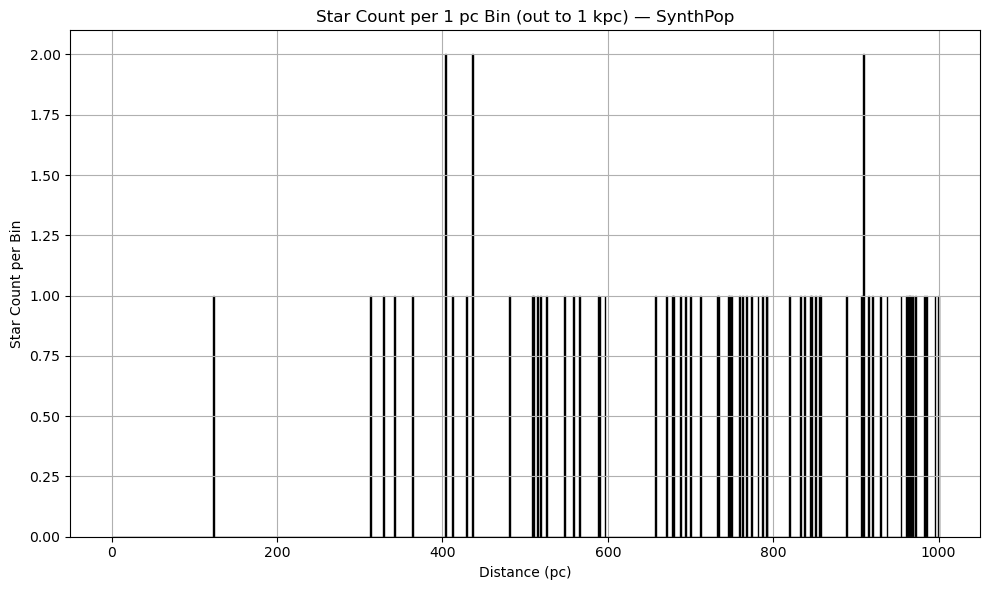

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Extract distance and population columns
distances = region_7synth['Dist_pc']

# Define bin edges: 0 to 1000 pc in 1 pc steps
bins = np.arange(0, 1001, 1)  # 1 pc bins from 0 to 1000

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=bins, color='skyblue', edgecolor='black')
plt.xlabel("Distance (pc)")
plt.ylabel("Star Count per Bin")
plt.title("Star Count per 1 pc Bin (out to 1 kpc) — SynthPop")
plt.grid(True)
plt.tight_layout()
plt.show()

# CMD

/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/755909255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_7synth['bp_rp'] = region_7synth['Gaia_BP_EDR3'] - region_7synth['Gaia_RP_EDR3']
/var/folders/y5/knvt2m2n6230b9gncfcjlhxw0000gn/T/ipykernel_29707/755909255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_7synth['abs_g_mag'] = region_7synth['Gaia_G_EDR3'] - 5 * np.log10(region_7synth['Dist_pc']) + 5


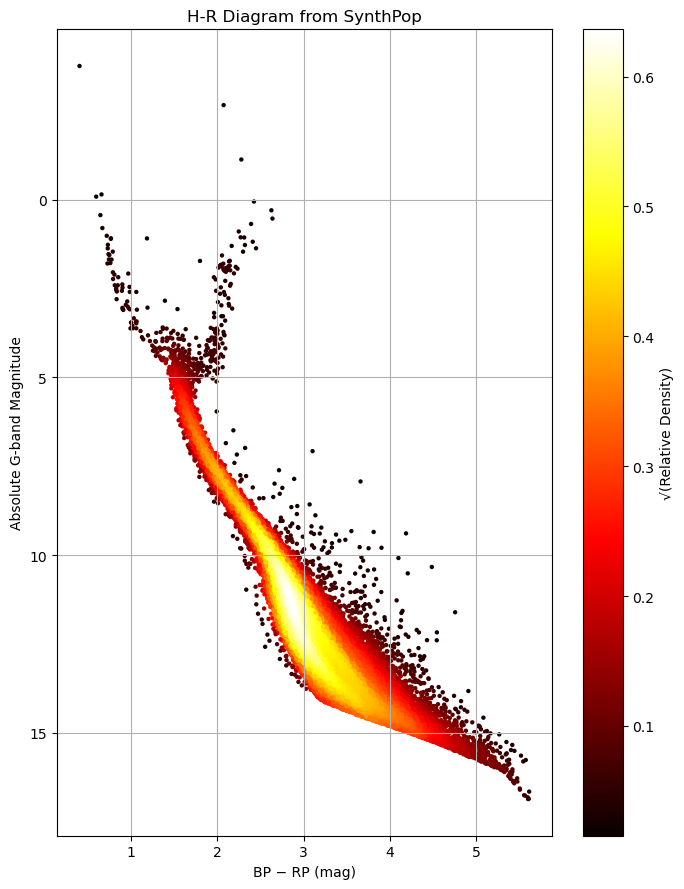

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize

# Step 1: Compute color and absolute G magnitude
region_7synth['bp_rp'] = region_7synth['Gaia_BP_EDR3'] - region_7synth['Gaia_RP_EDR3']
region_7synth['abs_g_mag'] = region_7synth['Gaia_G_EDR3'] - 5 * np.log10(region_7synth['Dist_pc']) + 5

# Step 2: Drop NaNs
cmd_data = region_7synth.dropna(subset=['bp_rp', 'abs_g_mag', 'pop'])

# Step 3: Extract coordinates and weights
x = cmd_data['bp_rp'].values
y = cmd_data['abs_g_mag'].values

# Step 4: Weighted density estimation
xy = np.vstack([x, y])
density = gaussian_kde(xy)(xy)
sqrt_density = np.sqrt(density)

# Step 5: Create a consistent normalization and colormap
norm = Normalize(sqrt_density.min(), sqrt_density.max())
cmap = plt.cm.hot

# Step 6: Plot CMD
plt.figure(figsize=(7, 9))
# Use the same normalization and colormap for the scatter plot
scatter_7 = plt.scatter(x, y, c=sqrt_density, cmap=cmap, norm=norm, s=10, edgecolor='none')
plt.gca().invert_yaxis()
plt.xlabel('BP − RP (mag)')
plt.ylabel('Absolute G-band Magnitude')
plt.title('H-R Diagram from SynthPop')

# Create a colorbar using the scatter plot as the mappable
cbar = plt.colorbar(scatter_7, label='√(Relative Density)')

plt.grid(True)
plt.tight_layout()
plt.show()

# From all 7 regions - Combined SynthPop Star Count per 1 pc Bin

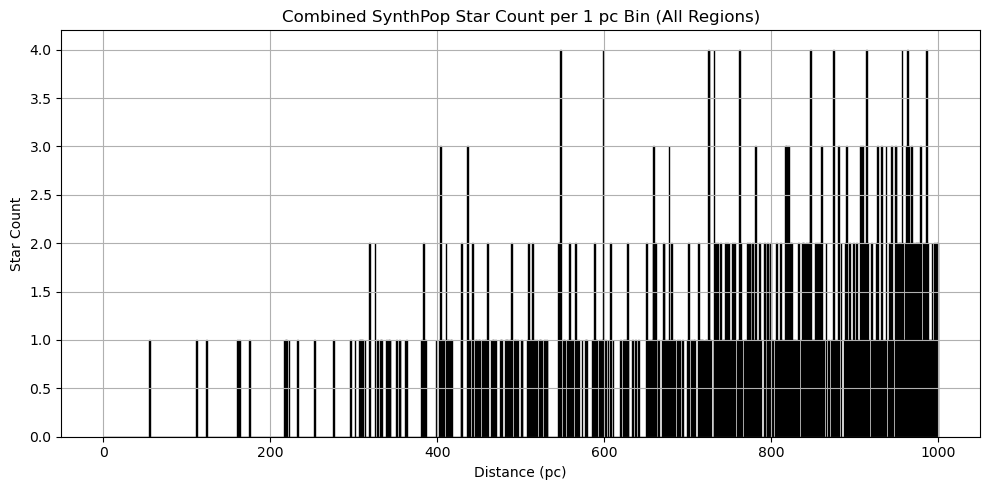

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate SynthPop DataFrames from all regions
synth_all = pd.concat([
    region_1synth, region_2synth, region_3synth,
    region_4synth, region_5synth, region_6synth, region_7synth
])

# Filter to only stars within 1 kpc
synth_filtered = synth_all[synth_all['Dist_pc'] <= 1000]

# Plot histogram without weighting
plt.figure(figsize=(10, 5))
plt.hist(
    synth_filtered['Dist_pc'], 
    bins=range(0, 1001), 
    color='orange', edgecolor='black'
)
plt.xlabel('Distance (pc)')
plt.ylabel('Star Count')
plt.title('Combined SynthPop Star Count per 1 pc Bin (All Regions)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [139]:
# Save filtered SynthPop distances to CSV
synth_filtered[['Dist_pc']].to_csv("synthpop_distances_under_1kpc.csv", index=False)


# Total Stars from all 7 regions < 1kpc

In [140]:
len(synth_filtered)

540

# Testing Astropy Separation method Region 2

In [141]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [142]:
region_2synth

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_V,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,bp_rp,abs_g_mag
1,0.0,0.153263,10.000000,-0.943025,0.153261,0.0,9.732698,235.169505,-51.019188,-116.343987,...,31.236381,29.374309,27.452914,29.438559,31.655536,27.645069,0.0,9732.697543,4.010467,14.497393
4,1.0,0.147012,14.000000,-2.231979,0.147008,0.0,3.939162,235.078129,-50.981482,21.568189,...,28.644378,26.943397,25.180036,27.026096,29.064067,25.343211,0.0,3939.161993,3.720856,14.049076
7,1.0,0.349839,14.000000,-1.800001,0.349825,0.0,4.617507,235.127906,-50.943818,-29.124595,...,27.180082,25.538429,23.838105,25.640631,27.605231,23.988461,0.0,4617.507114,3.616769,12.318593
8,1.0,0.284168,14.000000,-2.254081,0.284157,0.0,4.633789,235.119536,-51.011973,-130.570055,...,27.373924,25.775389,24.102743,25.875777,27.798913,24.251603,0.0,4633.789107,3.547310,12.546096
9,1.0,0.762248,14.000000,-0.924407,0.761871,0.0,4.810361,235.212754,-50.957324,-417.580239,...,22.390665,21.178137,19.808153,21.171282,22.708823,19.905697,0.0,4810.360961,2.803126,7.760394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125209,10.0,0.189190,8.593683,-0.121410,0.189188,0.0,24.737679,235.211457,-51.016493,129.344383,...,34.008334,31.982039,29.590371,31.834351,34.431162,29.857934,0.0,24737.678848,4.573228,14.867556
125210,10.0,0.345098,9.617316,-0.251791,0.345091,0.0,24.742513,235.114562,-50.981745,108.512149,...,31.841681,30.003027,27.996346,30.028665,32.260012,28.215789,0.0,24742.513051,4.044223,13.061446
125211,10.0,0.211903,9.874027,-0.236437,0.211900,0.0,24.822377,235.157314,-50.991393,112.413691,...,33.179426,31.265049,29.098611,31.226640,33.599321,29.343641,0.0,24822.376559,4.255681,14.252424
125212,10.0,0.151163,8.959588,-0.651492,0.151161,0.0,24.962437,235.112922,-51.003614,133.468741,...,33.511622,31.624588,29.617280,31.655204,33.927115,29.832979,0.0,24962.437029,4.094136,14.668769


In [147]:
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

def angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs):
    """
    Compute angular separation between two points (RA/Dec, degrees) in arcminutes.
    All inputs and output are floats.
    """
    # # Create a SkyCoord object in the Galactic frame
    # c_galactic = SkyCoord(l=l * u.deg, b=b * u.deg, frame='galactic')

    # # Transform to ICRS (RA, Dec)
    # c_icrs = c_galactic.transform_to('icrs')

    # # Access RA and Dec
    # ra_star = c_icrs.ra
    # dec_star = c_icrs.dec

    c1 = SkyCoord(beam_ra, beam_dec, unit='deg')
    c2 = SkyCoord(star_ras, star_decs, unit='deg')
    sep = c1.separation(c2)
    return sep.arcminute  # Output: float, arcminutes


In [148]:
def beam_scaling(beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin):
    """
    Vectorized version: all inputs are NumPy arrays.
    Returns theta_arcmin, scaling_factor, eirp_boost as arrays.
    """
    theta_arcmin = angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs)
    exponent = -4 * np.log(2) * (theta_arcmin / fwhm_arcmin)**2
    scaling_factor = np.exp(exponent)
    eirp_boost = np.where(scaling_factor > 0, 1.0 / scaling_factor, np.inf)
    return theta_arcmin, scaling_factor, eirp_boost

In [149]:
import pandas as pd
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

def process_beam(beam_ra, beam_dec, fwhm_arcmin, catalog_df):
    """
    Add beam sensitivity columns to existing DataFrame
    Inputs:
        beam_ra, beam_dec: Beam center (degrees)
        fwhm_arcmin: Beam width (arcminutes)
        catalog_df: DataFrame containing 'ra', 'dec'
    Returns: Modified DataFrame with new columns
    """
    # Pre-allocate arrays for performance
    n = len(catalog_df)
    theta_arr = np.empty(n)
    scaling_arr = np.empty(n)
    eirp_arr = np.empty(n)
    
    # Compute values for all stars
    for i, (_, row) in enumerate(catalog_df.iterrows()):
        theta_arr[i], scaling_arr[i], eirp_arr[i] = beam_scaling(
        beam_ra, beam_dec, row['ra'], row['dec'], fwhm_arcmin
        )

    # Add new columns to original DataFrame
    catalog_df = catalog_df.copy()  # Avoid SettingWithCopyWarning
    catalog_df['theta_arcmin'] = theta_arr
    catalog_df['scaling_factor'] = scaling_arr
    catalog_df['eirp_boost'] = eirp_arr
    
    return catalog_df


# Non Vectorized, took 84 seconds

In [150]:
region_2_astropy = process_beam(235.157257, -50.986211, 6.4, region_2synth)
region_2_astropy

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,bp_rp,abs_g_mag,theta_arcmin,scaling_factor,eirp_boost
1,0.0,0.153263,10.000000,-0.943025,0.153261,0.0,9.732698,235.169505,-51.019188,-116.343987,...,29.438559,31.655536,27.645069,0.0,9732.697543,4.010467,14.497393,2.031936,0.756179,1.322437
4,1.0,0.147012,14.000000,-2.231979,0.147008,0.0,3.939162,235.078129,-50.981482,21.568189,...,27.026096,29.064067,25.343211,0.0,3939.161993,3.720856,14.049076,3.002304,0.543271,1.840703
7,1.0,0.349839,14.000000,-1.800001,0.349825,0.0,4.617507,235.127906,-50.943818,-29.124595,...,25.640631,27.605231,23.988461,0.0,4617.507114,3.616769,12.318593,2.774876,0.593802,1.684064
8,1.0,0.284168,14.000000,-2.254081,0.284157,0.0,4.633789,235.119536,-51.011973,-130.570055,...,25.875777,27.798913,24.251603,0.0,4633.789107,3.547310,12.546096,2.101898,0.741520,1.348582
9,1.0,0.762248,14.000000,-0.924407,0.761871,0.0,4.810361,235.212754,-50.957324,-417.580239,...,21.171282,22.708823,19.905697,0.0,4810.360961,2.803126,7.760394,2.720419,0.605953,1.650294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125209,10.0,0.189190,8.593683,-0.121410,0.189188,0.0,24.737679,235.211457,-51.016493,129.344383,...,31.834351,34.431162,29.857934,0.0,24737.678848,4.573228,14.867556,2.736642,0.602332,1.660213
125210,10.0,0.345098,9.617316,-0.251791,0.345091,0.0,24.742513,235.114562,-50.981745,108.512149,...,30.028665,32.260012,28.215789,0.0,24742.513051,4.044223,13.061446,1.634809,0.834512,1.198306
125211,10.0,0.211903,9.874027,-0.236437,0.211900,0.0,24.822377,235.157314,-50.991393,112.413691,...,31.226640,33.599321,29.343641,0.0,24822.376559,4.255681,14.252424,0.310934,0.993477,1.006566
125212,10.0,0.151163,8.959588,-0.651492,0.151161,0.0,24.962437,235.112922,-51.003614,133.468741,...,31.655204,33.927115,29.832979,0.0,24962.437029,4.094136,14.668769,1.973172,0.768323,1.301536


# Vectorized, took less than 1 second

In [172]:
import pandas as pd
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

def angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs):
    """
    Compute angular separation between two points (RA/Dec, degrees) in arcminutes.
    All inputs and output are floats.
    """
    # # Create a SkyCoord object in the Galactic frame
    # c_galactic = SkyCoord(l=l * u.deg, b=b * u.deg, frame='galactic')

    # # Transform to ICRS (RA, Dec)
    # c_icrs = c_galactic.transform_to('icrs')

    # # Access RA and Dec
    # ra_star = c_icrs.ra
    # dec_star = c_icrs.dec

    c1 = SkyCoord(beam_ra, beam_dec, unit='deg')
    c2 = SkyCoord(star_ras, star_decs, unit='deg')
    sep = c1.separation(c2)
    return sep.arcminute  # Output: float, arcminutes

def beam_scaling(beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin):
    """
    Vectorized version: all inputs are NumPy arrays.
    Returns theta_arcmin, scaling_factor, eirp_boost as arrays.
    """
    theta_arcmin = angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs)
    exponent = -4 * np.log(2) * (theta_arcmin / fwhm_arcmin)**2
    scaling_factor = np.exp(exponent)
    eirp_boost = np.where(scaling_factor > 0, 1.0 / scaling_factor, np.inf)
    return theta_arcmin, scaling_factor, eirp_boost

def process_beam_vectorized(beam_ra, beam_dec, fwhm_arcmin, catalog_df):
    """
    Add beam sensitivity columns to existing DataFrame
    Inputs:
        beam_ra, beam_dec: Beam center (degrees)
        fwhm_arcmin: Beam width (arcminutes)
        catalog_df: DataFrame containing 'ra', 'dec'
    Returns: Modified DataFrame with new columns using SkyCoord
    Vectorized processing for large catalogs.
    """
    # Extract RA/Dec as numpy arrays
    star_ras = catalog_df['ra'].to_numpy()
    star_decs = catalog_df['dec'].to_numpy()
    
    # Compute metrics in bulk
    theta, scaling, eirp = beam_scaling(
    beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin
    )
    
    # Add results to DataFrame (no copying)
    catalog_df = catalog_df.copy()
    catalog_df['theta_arcmin'] = theta
    catalog_df['scaling_factor'] = scaling
    catalog_df['eirp_boost'] = eirp
    
    return catalog_df

In [173]:
region_2_astropy_vectorized = process_beam_vectorized(235.157257, -50.986211, 6.4, region_2synth)
region_2_astropy_vectorized

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,bp_rp,abs_g_mag,theta_arcmin,scaling_factor,eirp_boost
1,0.0,0.153263,10.000000,-0.943025,0.153261,0.0,9.732698,235.169505,-51.019188,-116.343987,...,29.438559,31.655536,27.645069,0.0,9732.697543,4.010467,14.497393,2.031936,0.756179,1.322437
4,1.0,0.147012,14.000000,-2.231979,0.147008,0.0,3.939162,235.078129,-50.981482,21.568189,...,27.026096,29.064067,25.343211,0.0,3939.161993,3.720856,14.049076,3.002304,0.543271,1.840703
7,1.0,0.349839,14.000000,-1.800001,0.349825,0.0,4.617507,235.127906,-50.943818,-29.124595,...,25.640631,27.605231,23.988461,0.0,4617.507114,3.616769,12.318593,2.774876,0.593802,1.684064
8,1.0,0.284168,14.000000,-2.254081,0.284157,0.0,4.633789,235.119536,-51.011973,-130.570055,...,25.875777,27.798913,24.251603,0.0,4633.789107,3.547310,12.546096,2.101898,0.741520,1.348582
9,1.0,0.762248,14.000000,-0.924407,0.761871,0.0,4.810361,235.212754,-50.957324,-417.580239,...,21.171282,22.708823,19.905697,0.0,4810.360961,2.803126,7.760394,2.720419,0.605953,1.650294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125209,10.0,0.189190,8.593683,-0.121410,0.189188,0.0,24.737679,235.211457,-51.016493,129.344383,...,31.834351,34.431162,29.857934,0.0,24737.678848,4.573228,14.867556,2.736642,0.602332,1.660213
125210,10.0,0.345098,9.617316,-0.251791,0.345091,0.0,24.742513,235.114562,-50.981745,108.512149,...,30.028665,32.260012,28.215789,0.0,24742.513051,4.044223,13.061446,1.634809,0.834512,1.198306
125211,10.0,0.211903,9.874027,-0.236437,0.211900,0.0,24.822377,235.157314,-50.991393,112.413691,...,31.226640,33.599321,29.343641,0.0,24822.376559,4.255681,14.252424,0.310934,0.993477,1.006566
125212,10.0,0.151163,8.959588,-0.651492,0.151161,0.0,24.962437,235.112922,-51.003614,133.468741,...,31.655204,33.927115,29.832979,0.0,24962.437029,4.094136,14.668769,1.973172,0.768323,1.301536


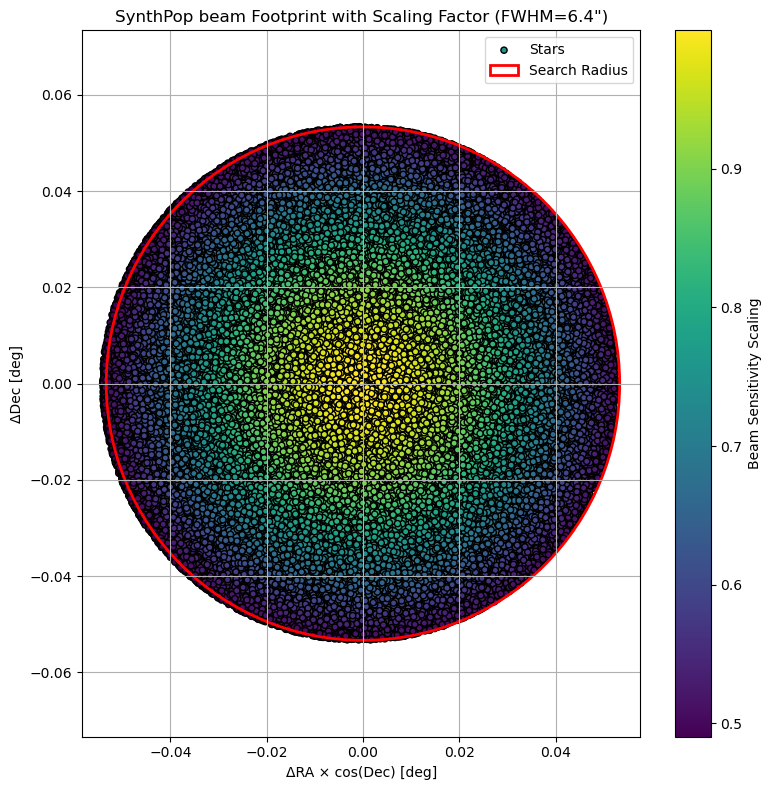

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib.patches import Circle

# Beam parameters
ra_center = 235.157257 * u.deg  # Convert to Quantity with units
dec_center = -50.986211 * u.deg # Convert to Quantity with units
fwhm_arcmin = 6.4
radius_deg = (fwhm_arcmin / 2.0) / 60.0

# Calculate cos_dec using the Quantity object for dec_center
# Ensure dec_center is in radians for np.cos, or use astropy.coordinates.Angle
cos_dec = np.cos(dec_center.to(u.rad))

# Extract RA/Dec and explicitly convert their underlying NumPy arrays to Quantity objects
# This is the key change for robustness: using .values to get the array, then applying units
ra_stars = region_2_astropy_vectorized['ra'].values * u.deg
dec_stars = region_2_astropy_vectorized['dec'].values * u.deg

# Coordinate transformation
# Now ra_stars and ra_center both have units, allowing subtraction
scaled_ras = (ra_stars - ra_center) * cos_dec
scaled_decs = dec_stars - dec_center

# Ensure the results are plain numpy arrays for plotting if matplotlib has issues with Quantity
# Although matplotlib often handles Quantity, converting to value can prevent unexpected behavior.
scaled_ras_val = scaled_ras.to(u.deg).value
scaled_decs_val = scaled_decs.to(u.deg).value

# Plot with scaling_factor as color
plt.figure(figsize=(8, 8))
sc = plt.scatter(scaled_ras_val, scaled_decs_val, c=region_2_astropy_vectorized['scaling_factor'],
                 cmap='viridis', s=20, edgecolor='k', label='Stars')

# Add beam circle
# Circle expects plain numerical values for coordinates and radius
circle = Circle((0, 0), radius_deg, edgecolor='red', facecolor='none', linewidth=2, label='Search Radius')
plt.gca().add_patch(circle)

plt.xlabel('ΔRA × cos(Dec) [deg]')
plt.ylabel('ΔDec [deg]')
plt.title(f'SynthPop beam Footprint with Scaling Factor (FWHM={fwhm_arcmin}")')
plt.gca().set_aspect('equal', adjustable='datalim')
plt.colorbar(sc, label='Beam Sensitivity Scaling')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Region 7

In [255]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [254]:
region_7synth

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor,eirp_boost
0,0.0,0.458080,10.000000,0.237072,0.458069,0.0,2.919359,296.385857,33.559634,51.939887,...,23.206964,21.527421,23.218611,24.928475,21.782211,0.0,2919.358519,0.369002,0.987597,1.012558
2,0.0,0.259769,10.000000,-0.098472,0.259765,0.0,3.959666,296.376404,33.537223,182.214605,...,25.100777,23.419485,25.119996,26.867287,23.671452,0.0,3959.666161,1.706466,0.765746,1.305915
3,0.0,0.887614,10.000000,0.216006,0.887447,0.0,4.194471,296.400256,33.548716,47.555343,...,19.731365,18.874682,19.926770,20.897760,18.981605,0.0,4194.471185,1.322543,0.851874,1.173883
4,0.0,0.141569,10.000000,-0.287859,0.141567,0.0,4.263371,296.347735,33.532381,106.886926,...,26.684092,24.904084,26.664364,28.527309,25.171101,0.0,4263.371030,2.631459,0.530106,1.886414
6,0.0,0.157580,10.000000,0.163199,0.157578,0.0,4.588524,296.395284,33.563206,-46.828233,...,28.314931,25.981064,27.897139,30.674128,26.190892,0.0,4588.523724,0.641715,0.962960,1.038465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39434,10.0,0.479740,9.364022,-0.487673,0.479723,0.0,24.967551,296.387942,33.560272,-237.821972,...,26.639242,25.470759,26.854108,28.182979,25.628715,0.0,24967.551083,0.395285,0.985781,1.014424
39435,10.0,0.120941,8.633688,-0.681452,0.120940,0.0,24.987377,296.393640,33.532937,-212.352740,...,30.573298,28.980363,30.648240,32.381551,29.216342,0.0,24987.376547,2.010937,0.690290,1.448667
39436,10.0,0.376787,8.567752,-0.443449,0.376779,0.0,24.956684,296.366968,33.550916,-181.202910,...,27.629611,26.324699,27.809765,29.257752,26.511655,0.0,24956.683833,1.161376,0.883711,1.131591
39437,10.0,0.512800,8.791749,-0.655901,0.512778,0.0,24.930151,296.374772,33.581589,-224.201558,...,26.139830,25.059209,26.361097,27.590117,25.201392,0.0,24930.151193,1.060665,0.902024,1.108618


In [256]:
region_7synth_vectorized = process_beam_vectorized(296.382669, 33.565181, 5.5, region_7synth)
region_7synth_vectorized

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor,eirp_boost
0,0.0,0.458080,10.000000,0.237072,0.458069,0.0,2.919359,296.385857,33.559634,51.939887,...,23.206964,21.527421,23.218611,24.928475,21.782211,0.0,2919.358519,0.369002,0.987597,1.012558
2,0.0,0.259769,10.000000,-0.098472,0.259765,0.0,3.959666,296.376404,33.537223,182.214605,...,25.100777,23.419485,25.119996,26.867287,23.671452,0.0,3959.666161,1.706466,0.765746,1.305915
3,0.0,0.887614,10.000000,0.216006,0.887447,0.0,4.194471,296.400256,33.548716,47.555343,...,19.731365,18.874682,19.926770,20.897760,18.981605,0.0,4194.471185,1.322543,0.851874,1.173883
4,0.0,0.141569,10.000000,-0.287859,0.141567,0.0,4.263371,296.347735,33.532381,106.886926,...,26.684092,24.904084,26.664364,28.527309,25.171101,0.0,4263.371030,2.631459,0.530106,1.886414
6,0.0,0.157580,10.000000,0.163199,0.157578,0.0,4.588524,296.395284,33.563206,-46.828233,...,28.314931,25.981064,27.897139,30.674128,26.190892,0.0,4588.523724,0.641715,0.962960,1.038465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39434,10.0,0.479740,9.364022,-0.487673,0.479723,0.0,24.967551,296.387942,33.560272,-237.821972,...,26.639242,25.470759,26.854108,28.182979,25.628715,0.0,24967.551083,0.395285,0.985781,1.014424
39435,10.0,0.120941,8.633688,-0.681452,0.120940,0.0,24.987377,296.393640,33.532937,-212.352740,...,30.573298,28.980363,30.648240,32.381551,29.216342,0.0,24987.376547,2.010937,0.690290,1.448667
39436,10.0,0.376787,8.567752,-0.443449,0.376779,0.0,24.956684,296.366968,33.550916,-181.202910,...,27.629611,26.324699,27.809765,29.257752,26.511655,0.0,24956.683833,1.161376,0.883711,1.131591
39437,10.0,0.512800,8.791749,-0.655901,0.512778,0.0,24.930151,296.374772,33.581589,-224.201558,...,26.139830,25.059209,26.361097,27.590117,25.201392,0.0,24930.151193,1.060665,0.902024,1.108618


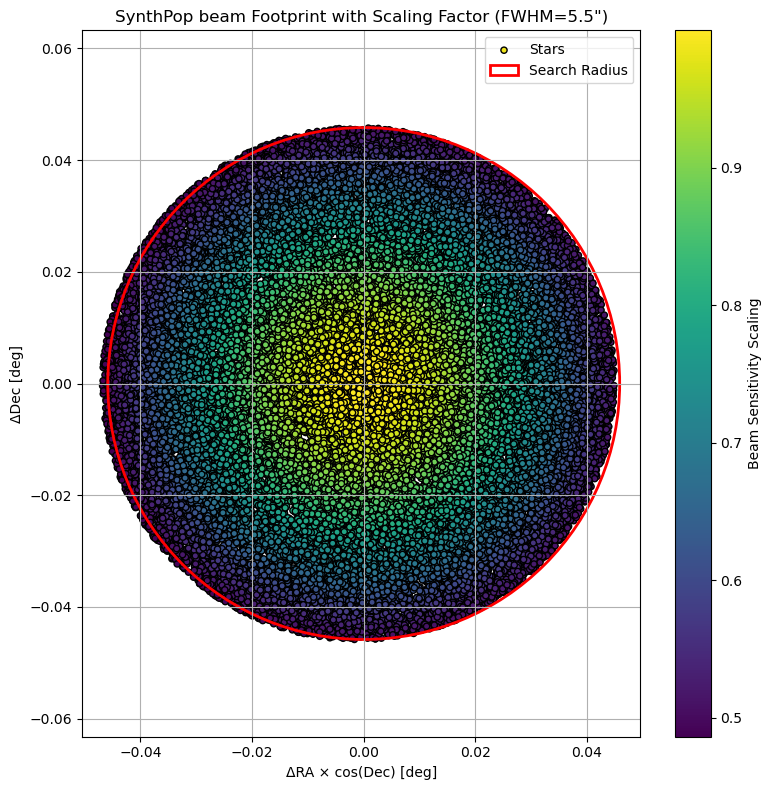

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib.patches import Circle

# Beam parameters
ra_center = 296.382669 * u.deg  # Convert to Quantity with units
dec_center = 33.565181 * u.deg # Convert to Quantity with units
fwhm_arcmin = 5.5
radius_deg = (fwhm_arcmin / 2.0) / 60.0

# Calculate cos_dec using the Quantity object for dec_center
# Ensure dec_center is in radians for np.cos, or use astropy.coordinates.Angle
cos_dec = np.cos(dec_center.to(u.rad))

# Extract RA/Dec and explicitly convert their underlying NumPy arrays to Quantity objects
# This is the key change for robustness: using .values to get the array, then applying units
ra_stars = region_7synth_vectorized['ra'].values * u.deg
dec_stars = region_7synth_vectorized['dec'].values * u.deg

# Coordinate transformation
# Now ra_stars and ra_center both have units, allowing subtraction
scaled_ras = (ra_stars - ra_center) * cos_dec
scaled_decs = dec_stars - dec_center

# Ensure the results are plain numpy arrays for plotting if matplotlib has issues with Quantity
# Although matplotlib often handles Quantity, converting to value can prevent unexpected behavior.
scaled_ras_val = scaled_ras.to(u.deg).value
scaled_decs_val = scaled_decs.to(u.deg).value

# Plot with scaling_factor as color
plt.figure(figsize=(8, 8))
sc = plt.scatter(scaled_ras_val, scaled_decs_val, c=region_7synth_vectorized['scaling_factor'],
                 cmap='viridis', s=20, edgecolor='k', label='Stars')

# Add beam circle
# Circle expects plain numerical values for coordinates and radius
circle = Circle((0, 0), radius_deg, edgecolor='red', facecolor='none', linewidth=2, label='Search Radius')
plt.gca().add_patch(circle)

plt.xlabel('ΔRA × cos(Dec) [deg]')
plt.ylabel('ΔDec [deg]')
plt.title(f'SynthPop beam Footprint with Scaling Factor (FWHM={fwhm_arcmin}")')
plt.gca().set_aspect('equal', adjustable='datalim')
plt.colorbar(sc, label='Beam Sensitivity Scaling')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [175]:
import pandas as pd
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

def angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs):
    """
    Compute angular separation between two points (RA/Dec, degrees) in arcminutes.
    All inputs and output are floats.
    """
    # # Create a SkyCoord object in the Galactic frame
    # c_galactic = SkyCoord(l=l * u.deg, b=b * u.deg, frame='galactic')

    # # Transform to ICRS (RA, Dec)
    # c_icrs = c_galactic.transform_to('icrs')

    # # Access RA and Dec
    # ra_star = c_icrs.ra
    # dec_star = c_icrs.dec

    c1 = SkyCoord(beam_ra, beam_dec, unit='deg')
    c2 = SkyCoord(star_ras, star_decs, unit='deg')
    sep = c1.separation(c2)
    return sep.arcminute  # Output: float, arcminutes

def beam_scaling(beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin):
    """
    Vectorized version: all inputs are NumPy arrays.
    Returns theta_arcmin, scaling_factor, eirp_boost as arrays.
    """
    theta_arcmin = angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs)
    exponent = -4 * np.log(2) * (theta_arcmin / fwhm_arcmin)**2
    scaling_factor = np.exp(exponent)
    eirp_boost = np.where(scaling_factor > 0, 1.0 / scaling_factor, np.inf)
    return theta_arcmin, scaling_factor, eirp_boost

def process_beam_astropy_vectorized(beam_ra, beam_dec, fwhm_arcmin, df):
    """
    Add beam sensitivity columns to existing DataFrame
    Inputs:
        beam_ra, beam_dec: Beam center (degrees)
        fwhm_arcmin: Beam width (arcminutes)
        df: DataFrame containing 'ra', 'dec'
    Returns: Modified DataFrame with new columns using SkyCoord
    Vectorized processing for large catalogs.
    """
    # Always work on a copy!
    df = df.copy()
    # Extract RA/Dec as numpy arrays
    star_ras = df['ra'].to_numpy()
    star_decs = df['dec'].to_numpy()
    
    # Compute metrics in bulk
    theta, scaling, eirp = beam_scaling(
    beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin)
    
    # Add results to DataFrame (no copying)
    df = df.copy()
    df.loc[:, 'theta_arcmin'] = theta
    df.loc[:, 'scaling_factor'] = scaling
    df.loc[:, 'eirp_boost'] = eirp
    return df

In [176]:
def calculate_log_eirpmin(df, fmin, eirp_boost):
    log_4pi = np.log10(4 * np.pi)
    d_m = df.loc[:, "Dist_pc"].to_numpy() * 3.086e16  # parsecs to meters
    df['logEIRPmin'] = log_4pi + 2 * np.log10(d_m) + np.log10(fmin) + np.log10(df['eirp_boost'])
    return df


In [ ]:
def analyze_shells_with_uncertainty_cumulative_log_synth(df, log_eirp_shells, fmin, nu_rel)
    results = []
        for log_shell_val in log_eirp_shells:
            shell_val = 10**log_shell_val
            n_stars = np.sum(df['logEIRPmin'] <= log_shell_val)
            n_stars_err = np.sqrt(n_stars) if n_stars > 0 else np.nan
            cwtfm = (shell_val / 1e13) * (0.5 / nu_rel) * (1000 / n_stars) if n_stars > 0 else np.nan
            # Poisson error propagation for CWTFM
            cwtfm_err = cwtfm * (n_stars_err / n_stars) if n_stars > 0 else np.nan
            results.append({
                'EIRPmin_shell': shell_val,
                'n_stars': n_stars,
                'n_stars_err': n_stars_err,
                'CWTFM': cwtfm,
                'CWTFM_err': cwtfm_err
            })
        
    return pd.DataFrame(results)

# Complete Pipeline for SynthPop Data **********

In [186]:
import numpy as np
import pandas as pd

def process_synthpop_catalog(synth_df, beam_ra, beam_dec, fwhm_arcmin, fmin, nu_rel,
    log_eirp_shells=np.linspace(11, 18, 8)):
    """
    Process SynthPop catalog for SETI beam analysis.
    Returns a DataFrame with cumulative shell counts and Poisson errors.
    """
    # 1. Calculate beam sensitivity metrics
    def angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs):
        """
        Compute angular separation between two points (RA/Dec, degrees) in arcminutes.
        All inputs and output are floats.
        """
        # # Create a SkyCoord object in the Galactic frame
        # c_galactic = SkyCoord(l=l * u.deg, b=b * u.deg, frame='galactic')
    
        # # Transform to ICRS (RA, Dec)
        # c_icrs = c_galactic.transform_to('icrs')
    
        # # Access RA and Dec
        # ra_star = c_icrs.ra
        # dec_star = c_icrs.dec
    
        c1 = SkyCoord(beam_ra, beam_dec, unit='deg')
        c2 = SkyCoord(star_ras, star_decs, unit='deg')
        sep = c1.separation(c2)
        return sep.arcminute  # Output: float, arcminutes

    def beam_scaling(beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin):
        """
        Vectorized version: all inputs are NumPy arrays.
        Returns theta_arcmin, scaling_factor, eirp_boost as arrays.
        """
        theta_arcmin = angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs)
        exponent = -4 * np.log(2) * (theta_arcmin / fwhm_arcmin)**2
        scaling_factor = np.exp(exponent)
        eirp_boost = np.where(scaling_factor > 0, 1.0 / scaling_factor, np.inf)
        return theta_arcmin, scaling_factor, eirp_boost
    
    def process_beam_astropy_vectorized(beam_ra, beam_dec, fwhm_arcmin, df):
        """
        Add beam sensitivity columns to existing DataFrame
        Inputs:
            beam_ra, beam_dec: Beam center (degrees)
            fwhm_arcmin: Beam width (arcminutes)
            df: DataFrame containing 'ra', 'dec'
        Returns: Modified DataFrame with new columns using SkyCoord
        Vectorized processing for large catalogs.
        """
        # Always work on a copy!
        df = df.copy()
        # Extract RA/Dec as numpy arrays
        star_ras = df['ra'].to_numpy()
        star_decs = df['dec'].to_numpy()
        
        # Compute metrics in bulk
        theta, scaling, eirp = beam_scaling(
        beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin)
        
        # Add results to DataFrame (no copying)
        df = df.copy()
        df.loc[:, 'theta_arcmin'] = theta
        df.loc[:, 'scaling_factor'] = scaling
        df.loc[:, 'eirp_boost'] = eirp
        return df
    synth_df = process_beam_astropy_vectorized(beam_ra, beam_dec, fwhm_arcmin, synth_df)

    # 2. Calculate log10(EIRPmin) for each star (to avoid overflow)
    def calculate_log_eirpmin(df, fmin):
        log_4pi = np.log10(4 * np.pi)
        d_m = df.loc[:, "Dist_pc"].to_numpy() * 3.086e16  # parsecs to meters
        df['logEIRPmin'] = log_4pi + 2 * np.log10(d_m) + np.log10(fmin) + np.log10(df['eirp_boost'])
        return df
    synth_df = calculate_log_eirpmin(synth_df, fmin)

    # 3. Cumulative shell analysis
    def analyze_shells_with_uncertainty_cumulative_log_synth(df, log_eirp_shells, fmin, nu_rel):
        results = []
        for log_shell_val in log_eirp_shells:
            shell_val = 10**log_shell_val
            n_stars = np.sum(df['logEIRPmin'] <= log_shell_val)
            n_stars_err = np.sqrt(n_stars) # if n_stars > 0 else np.nan
            cwtfm = (shell_val / 1e13) * (0.5 / nu_rel) * (1000 / n_stars) if n_stars > 0 else np.nan
            # Poisson error propagation for CWTFM
            cwtfm_err = cwtfm * (n_stars_err / n_stars) if n_stars > 0 else np.nan
            results.append({
                'EIRPmin_shell': shell_val,
                'n_stars': n_stars,
                'n_stars_err': n_stars_err,
                'CWTFM': cwtfm,
                'CWTFM_err': cwtfm_err
            })
        return pd.DataFrame(results)
    shell_results = analyze_shells_with_uncertainty_cumulative_log_synth(synth_df, log_eirp_shells, fmin, nu_rel)
    return synth_df, shell_results

    # my_dict = {'processed_catalog': synth_df, 'shell_analysis': shell_results}
    # return my_dict

# Example of full pipeline using Region 7

In [187]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [188]:
region_7synth

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_R,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor,eirp_boost
0,0.0,0.458080,10.000000,0.237072,0.458069,0.0,2.919359,296.385857,33.559634,51.939887,...,23.206964,21.527421,23.218611,24.928475,21.782211,0.0,2919.358519,0.369002,0.987597,1.012558
2,0.0,0.259769,10.000000,-0.098472,0.259765,0.0,3.959666,296.376404,33.537223,182.214605,...,25.100777,23.419485,25.119996,26.867287,23.671452,0.0,3959.666161,1.706466,0.765746,1.305915
3,0.0,0.887614,10.000000,0.216006,0.887447,0.0,4.194471,296.400256,33.548716,47.555343,...,19.731365,18.874682,19.926770,20.897760,18.981605,0.0,4194.471185,1.322543,0.851874,1.173883
4,0.0,0.141569,10.000000,-0.287859,0.141567,0.0,4.263371,296.347735,33.532381,106.886926,...,26.684092,24.904084,26.664364,28.527309,25.171101,0.0,4263.371030,2.631459,0.530106,1.886414
6,0.0,0.157580,10.000000,0.163199,0.157578,0.0,4.588524,296.395284,33.563206,-46.828233,...,28.314931,25.981064,27.897139,30.674128,26.190892,0.0,4588.523724,0.641715,0.962960,1.038465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39434,10.0,0.479740,9.364022,-0.487673,0.479723,0.0,24.967551,296.387942,33.560272,-237.821972,...,26.639242,25.470759,26.854108,28.182979,25.628715,0.0,24967.551083,0.395285,0.985781,1.014424
39435,10.0,0.120941,8.633688,-0.681452,0.120940,0.0,24.987377,296.393640,33.532937,-212.352740,...,30.573298,28.980363,30.648240,32.381551,29.216342,0.0,24987.376547,2.010937,0.690290,1.448667
39436,10.0,0.376787,8.567752,-0.443449,0.376779,0.0,24.956684,296.366968,33.550916,-181.202910,...,27.629611,26.324699,27.809765,29.257752,26.511655,0.0,24956.683833,1.161376,0.883711,1.131591
39437,10.0,0.512800,8.791749,-0.655901,0.512778,0.0,24.930151,296.374772,33.581589,-224.201558,...,26.139830,25.059209,26.361097,27.590117,25.201392,0.0,24930.151193,1.060665,0.902024,1.108618


In [210]:
synth_df, shell_results = process_synthpop_catalog(region_7synth, 296.382669, 33.565181, 5.5, 1e-26, 0.769, log_eirp_shells=np.linspace(11, 18, 8))

In [211]:
synth_df

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Bessell_I,Gaia_G_EDR3,Gaia_BP_EDR3,Gaia_RP_EDR3,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor,eirp_boost,logEIRPmin
0,0.0,0.458080,10.000000,0.237072,0.458069,0.0,2.919359,296.385857,33.559634,51.939887,...,21.527421,23.218611,24.928475,21.782211,0.0,2919.358519,0.369002,0.987597,1.012558,15.013997
2,0.0,0.259769,10.000000,-0.098472,0.259765,0.0,3.959666,296.376404,33.537223,182.214605,...,23.419485,25.119996,26.867287,23.671452,0.0,3959.666161,1.706466,0.765746,1.305915,15.389234
3,0.0,0.887614,10.000000,0.216006,0.887447,0.0,4.194471,296.400256,33.548716,47.555343,...,18.874682,19.926770,20.897760,18.981605,0.0,4194.471185,1.322543,0.851874,1.173883,15.392981
4,0.0,0.141569,10.000000,-0.287859,0.141567,0.0,4.263371,296.347735,33.532381,106.886926,...,24.904084,26.664364,28.527309,25.171101,0.0,4263.371030,2.631459,0.530106,1.886414,15.613145
6,0.0,0.157580,10.000000,0.163199,0.157578,0.0,4.588524,296.395284,33.563206,-46.828233,...,25.981064,27.897139,30.674128,26.190892,0.0,4588.523724,0.641715,0.962960,1.038465,15.417740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39434,10.0,0.479740,9.364022,-0.487673,0.479723,0.0,24.967551,296.387942,33.560272,-237.821972,...,25.470759,26.854108,28.182979,25.628715,0.0,24967.551083,0.395285,0.985781,1.014424,16.878973
39435,10.0,0.120941,8.633688,-0.681452,0.120940,0.0,24.987377,296.393640,33.532937,-212.352740,...,28.980363,30.648240,32.381551,29.216342,0.0,24987.376547,2.010937,0.690290,1.448667,17.034412
39436,10.0,0.376787,8.567752,-0.443449,0.376779,0.0,24.956684,296.366968,33.550916,-181.202910,...,26.324699,27.809765,29.257752,26.511655,0.0,24956.683833,1.161376,0.883711,1.131591,16.926065
39437,10.0,0.512800,8.791749,-0.655901,0.512778,0.0,24.930151,296.374772,33.581589,-224.201558,...,25.059209,26.361097,27.590117,25.201392,0.0,24930.151193,1.060665,0.902024,1.108618,16.916233


In [212]:
shell_results

,EIRPmin_shell,n_stars,n_stars_err,CWTFM,CWTFM_err
0,1.000000e+11,0,0.000000,NaN,NaN
1,1.000000e+12,0,0.000000,NaN,NaN
2,1.000000e+13,2,1.414214,325.097529,229.878667
3,1.000000e+14,34,5.830952,191.233841,32.796333
4,1.000000e+15,999,31.606961,65.084590,2.059185
5,1.000000e+16,11272,106.169676,57.682315,0.543303
6,1.000000e+17,30885,175.741287,210.521308,1.197905
7,1.000000e+18,31480,177.426041,2065.422676,11.641035


In [218]:
shell_results["CWTFM_err"].to_numpy()

array([         nan,          nan, 229.87866749,  32.79633312,
         2.05918531,   0.54330311,   1.19790466,  11.64103457])

In [242]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transmitter_rate_vs_eirpmin_synthpop(shell_results, nu_rel=0.769):
    """
    Plot log(Transmitter Rate) vs log(EIRPmin) for SynthPop,
    with symmetric Poisson error bars, best-fit line, and vertical reference lines.
    """
    # Extract data
    eirp_shells = shell_results['EIRPmin_shell'].to_numpy()
    n_stars = shell_results['n_stars'].to_numpy()
    n_stars_err = shell_results['n_stars_err'].to_numpy()

    # Calculate transmitter rate and its symmetric errors
    with np.errstate(divide='ignore', invalid='ignore'):
        transmitter_rate = np.where(n_stars > 0, 1.0 / (n_stars * nu_rel), np.nan)
        n_stars_upper = n_stars + n_stars_err
        n_stars_lower = n_stars - n_stars_err

        transmitter_rate_pos = np.where(n_stars_lower > 0, 1.0 / (n_stars_lower * nu_rel), np.nan)
        transmitter_rate_neg = np.where(n_stars_upper > 0, 1.0 / (n_stars_upper * nu_rel), np.nan)

        # Symmetric error: average of |up-down|
        yerr_pos = transmitter_rate_pos - transmitter_rate
        yerr_neg = transmitter_rate - transmitter_rate_neg

        # Log values for plotting
        log_eirp = np.log10(eirp_shells)
        log_transmitter_rate = np.log10(transmitter_rate)
        # For error bars, use differences in log space
        log_yerr_pos = np.log10(transmitter_rate_pos) - log_transmitter_rate
        log_yerr_neg = log_transmitter_rate - np.log10(transmitter_rate_neg)

    # Mask for finite values and n_stars > 0
    mask = np.isfinite(log_eirp) & np.isfinite(log_transmitter_rate) & (n_stars > 0)
    x = log_eirp[mask]
    y = log_transmitter_rate[mask]
    yerr = np.array([log_yerr_neg[mask], log_yerr_pos[mask]])

    # Fit a line (excluding nan/infs)
    if len(x) > 1:
        fit = np.polyfit(x, y, 1)
        fit_line = np.polyval(fit, x)
    else:
        fit = [np.nan, np.nan]
        fit_line = np.full_like(x, np.nan)

    fig, ax = plt.subplots(figsize=(10, 6))
    # Asymmetric error bars: use yerr as [[neg], [pos]]
    ax.errorbar(
        x, y, yerr=yerr,
        fmt='o', capsize=5, markersize=8, label='SynthPop Shells'
    )
    if len(x) > 1:
        ax.plot(x, fit_line, 'k-', label='Best Fit Line')
    ax.axvline(13, color='red', linestyle='--', lw=2, label='Arecibo Radar (logEIRP=13)')
    ax.axvline(17, color='red', linestyle='--', lw=2, label='Kardashev I (logEIRP=17)')
    ax.set_xlabel('log$_{10}$(EIRP$_{\\mathrm{min}}$/W)', fontsize=12)
    ax.set_ylabel('log$_{10}$(Transmitter Rate)', fontsize=12)
    ax.set_title('Log (Transmitter Rate) vs Log (EIRPmin) [SynthPop]', fontsize=14)
    ax.set_xlim(11, 18)
    ax.set_ylim(-9, 3)
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()


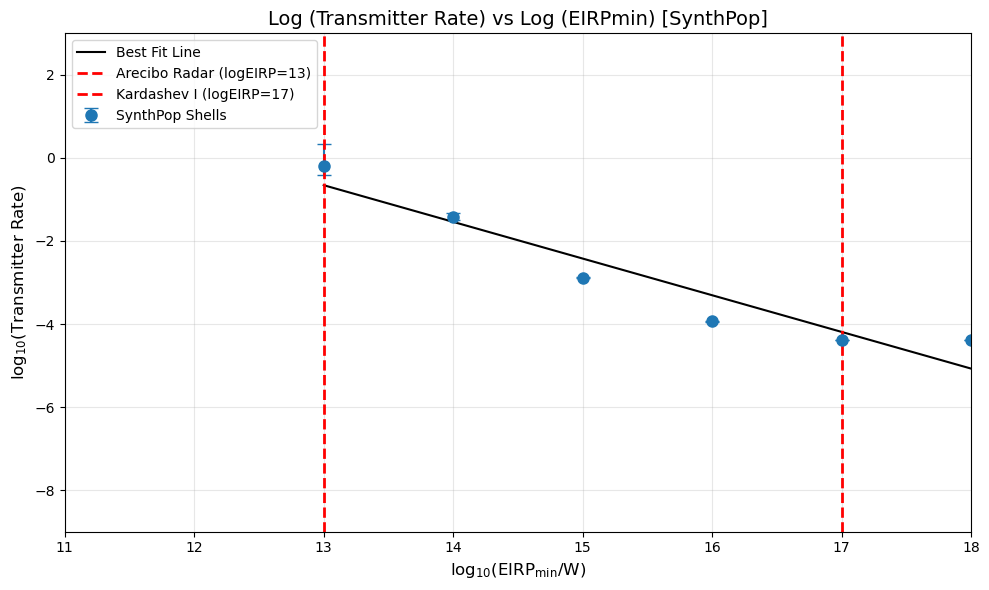

In [213]:
plot_transmitter_rate_vs_eirpmin_synthpop(shell_results, nu_rel=0.769)

# Quantifying Slope for Log Transmitter Rate vs log EIRPmin

In [244]:
def quantify_slope(shell_results, nu_rel=0.5):
    """
    Calculate the slope and intercept of log(Transmitter Rate) vs log(EIRPmin).
    """
    log_eirp = np.log10(shell_results['EIRPmin_shell'].values)
    n_stars = shell_results['n_stars'].values
    mask = (n_stars > 0)
    log_eirp = log_eirp[mask]
    transmitter_rate = 1.0 / (n_stars[mask] * nu_rel)
    log_transmitter_rate = np.log10(transmitter_rate)
    if len(log_eirp) > 1:
        fit = np.polyfit(log_eirp, log_transmitter_rate, 1)
        slope, intercept = fit[0], fit[1]
    else:
        slope, intercept = np.nan, np.nan
    return slope, intercept


In [220]:
quantify_slope(shell_results, nu_rel=0.769)

(np.float64(-0.8832075770824258), np.float64(10.825148153243788))

## 10 doesn't make sense!

# CWTFM Minima

In [222]:
import pandas as pd
import numpy as np

def find_cwtfm_minima(shell_results):
    """
    Find the EIRPmin shell where CWTFM is minimized.
    """
    idx_min = shell_results['CWTFM'].idxmin()
    if pd.isna(idx_min):
        return np.nan, np.nan
    row = shell_results.loc[idx_min]

    formatted_eirp_shell = f'{row["EIRPmin_shell"]:.2e}'

    return formatted_eirp_shell, row['CWTFM']


In [223]:
find_cwtfm_minima(shell_results)

('1.00e+16', np.float64(57.68231534045026))

# Concatenate Pipeline

In [227]:
df

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_over_error,pmra,pmra_error,pmdec,...,r_hi,r_len,target_observed_by,source_observed_by,fwhm_arcmin,offset_deg,offset_arcmin,telescope_response_gaussian,min_detectable_EIRP,price_target_
0,5278042880077383040,124.373564,0.531406,-61.916283,0.577067,191.530069,317.248718,-156.445708,1.257197,1099.603065,...,5.237054,854.145623,Parkes 10-cm,Parkes 10-cm,6.4,0.004946,0.296757,0.994057,9.979345e+10,True
1,5278019446732658176,124.323083,0.683469,-61.933165,0.722185,0.288692,0.386957,-9.208477,1.665850,4.106262,...,3424.169938,852.574779,Parkes 10-cm,Parkes 10-cm,6.4,0.053314,3.198850,0.500249,2.571122e+16,False
2,5278042914437037440,124.321704,0.017173,-61.921527,0.019508,0.306640,15.678685,1.455955,0.039321,-3.939431,...,3149.749330,852.831089,Parkes 10-cm,Parkes 10-cm,6.4,0.053294,3.197619,0.500516,6.391667e+16,False
3,5277995665498104576,124.405225,0.123812,-61.964518,0.137092,0.162447,1.190629,2.031666,0.288846,-0.058157,...,4666.506808,853.656804,Parkes 10-cm,Parkes 10-cm,6.4,0.052973,3.178368,0.504692,7.781783e+16,False
4,5277996009096662912,124.427643,0.465830,-61.920097,0.409031,0.134454,0.301610,-3.008525,1.080743,5.900701,...,3767.438101,855.297497,Parkes 10-cm,Parkes 10-cm,6.4,0.052656,3.159362,0.508823,3.617772e+16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356611,5353625817648324352,162.327898,0.169651,-53.323989,0.188827,0.002797,0.012486,-7.121278,0.332859,4.258981,...,6063.476843,1216.497976,Parkes 10-cm,Parkes 10-cm,6.4,0.004614,0.276850,0.994825,5.451843e+16,False
356612,5353625847691839616,162.331233,0.148051,-53.317264,0.161793,0.107848,0.543369,-6.472833,0.280615,0.680678,...,5731.854286,1216.642346,Parkes 10-cm,Parkes 10-cm,6.4,0.003272,0.196336,0.997394,4.785815e+16,False
356613,5353625817648467840,162.328145,0.401868,-53.322196,0.451638,-0.629335,-1.170949,-5.444157,0.841270,1.893667,...,5795.023651,1216.522702,Parkes 10-cm,Parkes 10-cm,6.4,0.002810,0.168584,0.998078,4.466139e+16,False
356614,5353625847691839488,162.328315,0.037486,-53.318426,0.041577,0.150904,3.040733,-4.872873,0.072231,1.066499,...,6255.618265,1216.567137,Parkes 10-cm,Parkes 10-cm,6.4,0.001153,0.069207,0.999676,8.723952e+16,False


In [233]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


In [250]:
import pandas as pd
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import synthpop  # Ensure SynthPop is imported

def batch_synthpop_full_pipeline(
    ra_list=None, dec_list=None, fwhm_list=None, 
    sightline_df=None, n_sightlines=10, limit_distance_pc=10000,
    config_file='huston2025_defaults.synthpop_conf',
    fmin=1e-26, nu_rel=0.769, log_eirp_shells=None
):
    """
    Generate and concatenate SynthPop catalogs for many regions, compute beam sensitivity,
    log(EIRPmin), and cumulative EIRPmin shell statistics with Poisson errors.

    Adds:
    - Column for maximum distance (pc) where a star at beam center (scaling factor=1) has the EIRPmin limit.
    - For shells with zero stars, error bars set to 1 (Poisson minimum).
    - If log_eirp_shells not provided, dynamically generate 8 shells spanning min to max EIRPmin based on fmin and max distance.

    Parameters
    ----------
    ra_list, dec_list, fwhm_list : array-like, optional
        Arrays/lists of RA (deg), Dec (deg), and FWHM (arcmin) for each sightline.
    sightline_df : pandas.DataFrame, optional
        DataFrame with columns 'ra', 'dec', 'fwhm_arcmin'. If provided, overrides arrays.
    n_sightlines : int, optional
        Number of sightlines (rows) to process (default 10).
    limit_distance_pc : float, optional
        Maximum value of Dist_pc for inclusion (default 10,000).
    config_file : str, optional
        Path to SynthPop configuration file.
    fmin : float, optional
        Minimum detectable flux density (W m^-2 Hz^-1) for EIRPmin calculation.
    nu_rel : float, optional
        Relative observing bandwidth (unitless) for CWTFM calculation.
    log_eirp_shells : array-like, optional
        Array of log10(EIRPmin) shell boundaries for cumulative statistics.
        If None, shells are generated automatically.

    Returns
    -------
    combined_df : pandas.DataFrame
        Concatenated DataFrame of all SynthPop results, filtered by distance,
        with beam sensitivity columns, log(EIRPmin), and max distance at EIRPmin.
    shell_results : pandas.DataFrame
        DataFrame with EIRPmin shell, n_stars, n_stars_err, CWTFM, and CWTFM_err
        for all concatenated regions.

    Notes
    -----
    - SynthPop is initialized once and used for all regions.
    - For each region, stars are simulated, beam sensitivity (angular separation, scaling factor,
      EIRPmin boost) is computed, and results are filtered by distance.
    - EIRPmin is calculated in log space.
    - Cumulative shell statistics and Poisson errors are computed for the concatenated sample.
    - In the Wlodarczyk-Sroka et al. (2020) paper, they use EIRPmin shells as np.linspace(11, 18, 8)
    """
    # Calculate beam sensitivity metrics
    def angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs):
        """
        Compute angular separation between two points (RA/Dec, degrees) in arcminutes.
        All inputs and output are floats.
        """
        # Create a SkyCoord object in the Galactic frame
        # c_galactic = SkyCoord(l=l * u.deg, b=b * u.deg, frame='galactic')
    
        # # Transform to ICRS (RA, Dec)
        # c_icrs = c_galactic.transform_to('icrs')
    
        # # Access RA and Dec
        # ra_star = c_icrs.ra
        # dec_star = c_icrs.dec
    
        c1 = SkyCoord(beam_ra, beam_dec, unit='deg')
        c2 = SkyCoord(star_ras, star_decs, unit='deg')
        sep = c1.separation(c2)
        return sep.arcminute  # Output: float, arcminutes

    def beam_scaling(beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin):
        """
        Vectorized version: all inputs are NumPy arrays.
        Returns theta_arcmin, scaling_factor, eirp_boost as arrays.
        """
        theta_arcmin = angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs)
        exponent = -4 * np.log(2) * (theta_arcmin / fwhm_arcmin)**2
        scaling_factor = np.exp(exponent)
        eirp_boost = np.where(scaling_factor > 0, 1.0 / scaling_factor, np.inf)
        return theta_arcmin, scaling_factor, eirp_boost
    
    def process_beam_astropy_vectorized(beam_ra, beam_dec, fwhm_arcmin, df):
        """
        Add beam sensitivity columns to existing DataFrame
        Inputs:
            beam_ra, beam_dec: Beam center (degrees)
            fwhm_arcmin: Beam width (arcminutes)
            df: DataFrame containing 'ra', 'dec'
        Returns: Modified DataFrame with new columns using SkyCoord
        Vectorized processing for large catalogs.
        """
        # Always work on a copy!
        df = df.copy()
        # Extract RA/Dec as numpy arrays
        star_ras = df['ra'].to_numpy()
        star_decs = df['dec'].to_numpy()
        
        # Compute metrics in bulk
        theta, scaling, eirp = beam_scaling(
        beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin)
        
        # Add results to DataFrame (no copying)
        df = df.copy()
        df.loc[:, 'theta_arcmin'] = theta
        df.loc[:, 'scaling_factor'] = scaling
        df.loc[:, 'eirp_boost'] = eirp
        return df
        
    def calculate_log_eirpmin(df, fmin):
        log_4pi = np.log10(4 * np.pi)
        d_m = df.loc[:, "Dist_pc"].to_numpy() * 3.086e16  # parsecs to meters
        df['logEIRPmin'] = log_4pi + 2 * np.log10(d_m) + np.log10(fmin) + np.log10(df['eirp_boost'])
        # Add max distance at EIRPmin for scaling factor = 1 (pc)
        eirpmin = 10 ** df['logEIRPmin']
        d_max_m = np.sqrt(eirpmin / (4 * np.pi * fmin))  # meters
        df['max_distance_pc_at_eirpmin'] = d_max_m / 3.086e16  # convert to pc
        return df
        
    # 3. Cumulative shell analysis
    def analyze_shells_with_uncertainty_cumulative_log_synth(df, log_eirp_shells, fmin, nu_rel):
        results = []
        for log_shell_val in log_eirp_shells:
            shell_val = 10**log_shell_val
            n_stars = np.sum(df['logEIRPmin'] <= log_shell_val)
            n_stars_err = np.sqrt(n_stars) # if n_stars > 0 else np.nan
            # If zero stars, set error bars to 1 (Poisson minimum)
            if n_stars == 0:
                n_stars_err = 1
            cwtfm = (shell_val / 1e13) * (0.5 / nu_rel) * (1000 / n_stars) if n_stars > 0 else np.nan
            # Poisson error propagation for CWTFM
            cwtfm_err = cwtfm * (n_stars_err / n_stars) if n_stars > 0 else np.nan
            results.append({
                'EIRPmin_shell': shell_val,
                'n_stars': n_stars,
                'n_stars_err': n_stars_err,
                'CWTFM': cwtfm,
                'CWTFM_err': cwtfm_err
            })
        return pd.DataFrame(results)

    # If log_eirp_shells not provided, generate dynamically based on fmin and max distance
    if log_eirp_shells is None:
        # Calculate EIRPmin at max distance (limit_distance_pc)
        d_max_m = limit_distance_pc * 3.086e16  # pc to meters
        eirpmin_max = 4 * np.pi * d_max_m**2 * fmin
        # Calculate EIRPmin at min distance = 1 pc (or 0.1 pc to avoid log(0))
        d_min_m = 1 * 3.086e16
        eirpmin_min = 4 * np.pi * d_min_m**2 * fmin
        # Generate 8 log spaced shells between these limits, rounded up/down to nearest integer
        log_min = np.floor(np.log10(eirpmin_min))
        log_max = np.ceil(np.log10(eirpmin_max))
        log_eirp_shells = np.linspace(log_min, log_max, 8)
        
    # Prepare input arrays
    if sightline_df is not None:
        ra_array = sightline_df['ra'].to_numpy()
        dec_array = sightline_df['dec'].to_numpy()
        fwhm_array = sightline_df['fwhm_arcmin'].to_numpy()
    else:
        ra_array = np.asarray(ra_list)
        dec_array = np.asarray(dec_list)
        fwhm_array = np.asarray(fwhm_list)

    n_total = min(len(ra_array), len(dec_array), len(fwhm_array), n_sightlines)
    all_results = []

    # Initialize SynthPop ONCE
    mod = synthpop.SynthPop(
        config_file,
        extinction_map_kwargs={'name':'maps_from_dustmaps', 'dustmap_name': 'sfd'},
        chosen_bands = ['Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', "Gaia_G_EDR3", "Gaia_BP_EDR3", "Gaia_RP_EDR3"],
        maglim = ['Bessell_I', 99, "keep"],
        post_processing_kwargs=[{"name": "ProcessDarkCompactObjects","remove": False}, 
                               {"name":"equatorial_coordinates"}],
        name_for_output='mod2test'
    )
    mod.init_populations()

    for i in range(n_total):
        ra_deg = ra_array[i]
        dec_deg = dec_array[i]
        fwhm_arcmin = fwhm_array[i]
        # Convert RA/Dec to Galactic l, b
        coord = SkyCoord(ra=ra_deg * u.deg, dec=dec_deg * u.deg, frame='icrs')
        l = coord.galactic.l.deg
        b = coord.galactic.b.deg
        # FWHM to solid angle (deg^2)
        radius_deg = (fwhm_arcmin / 2) / 60
        solid_angle_deg2 = np.pi * radius_deg**2
        # Run SynthPop
        cat, distr = mod.process_location(
            l_deg=l, b_deg=b,
            solid_angle=solid_angle_deg2,
            solid_angle_unit='deg^2'
        )
        cat["Dist_pc"] = cat["Dist"] * 1000
        cat = process_beam_vectorized(ra_deg, dec_deg, fwhm_arcmin, cat)
        # Optionally filter by distance
        cat = cat[cat["Dist_pc"] <= limit_distance_pc].copy()
        # Add metadata for region
        cat['input_ra'] = ra_deg
        cat['input_dec'] = dec_deg
        cat['input_fwhm_arcmin'] = fwhm_arcmin
        all_results.append(cat)
    
    # Concatenate all results into a single DataFrame
    if all_results:
        combined_df = pd.concat(all_results, ignore_index=True)
    else:
        combined_df = pd.DataFrame()
    # Calculate log(EIRPmin)
    if not combined_df.empty:
        combined_df = calculate_log_eirpmin(combined_df, fmin)
        shell_results = analyze_shells_with_uncertainty_cumulative_log_synth(combined_df, log_eirp_shells, fmin, nu_rel)
    else:
        shell_results = pd.DataFrame()

    return combined_df, shell_results

In [251]:
combined_df, shell_results = batch_synthpop_full_pipeline(
    sightline_df=df_small,
    n_sightlines=len(df_small),
    limit_distance_pc=10000,
    fmin=1e-26,
    nu_rel=0.769,
    log_eirp_shells=np.linspace(11, 18, 8)
)



################################ Settings #################################
 856960207 - # reading default parameters from
 856960209 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 856960211 - # read configuration from 
 856960212 - config_file = 'huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 856960213 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 1436499352,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "a

In [252]:
combined_df

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor,eirp_boost,input_ra,input_dec,input_fwhm_arcmin,logEIRPmin,max_distance_pc_at_eirpmin
0,1.0,0.400762,14.000000,-2.498888,0.400741,0.0,3.079569,124.339003,-61.927398,150.893742,...,0.0,3079.569063,1.182113,0.909746,1.099208,124.373564,-61.916283,6.4,15.096061,3228.715889
1,1.0,0.222085,14.000000,-1.307930,0.222078,0.0,3.780210,124.384975,-61.874864,-75.461425,...,0.0,3780.209568,2.505971,0.653713,1.529723,124.373564,-61.916283,6.4,15.417646,4675.437582
2,1.0,0.085129,14.000000,-0.306723,0.085129,0.0,4.441796,124.419366,-61.932158,30.352797,...,0.0,4441.795809,1.606258,0.839755,1.190823,124.373564,-61.916283,6.4,15.448966,4847.103353
3,1.0,0.103225,14.000000,-0.514744,0.103224,0.0,4.419202,124.380687,-61.950548,141.644918,...,0.0,4419.201797,2.065739,0.749123,1.334895,124.373564,-61.916283,6.4,15.494136,5105.841970
4,1.0,0.107981,14.000000,-1.933367,0.107980,0.0,4.421381,124.388617,-61.908678,-264.901290,...,0.0,4421.381365,0.623743,0.974009,1.026685,124.373564,-61.916283,6.4,15.380555,4479.985280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136077,10.0,0.121231,9.627068,-0.307957,0.121230,0.0,9.919451,296.380873,33.552614,-67.672428,...,0.0,9919.451033,0.759384,0.948518,1.054276,296.382669,33.565181,5.5,16.093931,10185.089732
136078,10.0,0.199208,7.782875,-0.677062,0.199205,0.0,9.986670,296.400132,33.595169,-94.981131,...,0.0,9986.670499,1.999847,0.693110,1.442773,296.382669,33.565181,5.5,16.236041,11995.538286
136079,10.0,0.244563,7.135345,-0.113209,0.244561,0.0,9.923534,296.351576,33.559692,-89.224935,...,0.0,9923.534407,1.589070,0.793387,1.260419,296.382669,33.565181,5.5,16.171849,11140.990682
136080,10.0,0.117855,8.791885,-0.076054,0.117855,0.0,9.925622,296.339440,33.594393,-71.508513,...,0.0,9925.621796,2.782343,0.491867,2.033071,296.382669,33.565181,5.5,16.379670,14152.526071


In [253]:
shell_results

,EIRPmin_shell,n_stars,n_stars_err,CWTFM,CWTFM_err
0,1.000000e+11,0,1.000000,NaN,NaN
1,1.000000e+12,0,1.000000,NaN,NaN
2,1.000000e+13,14,3.741657,46.442504,12.412281
3,1.000000e+14,346,18.601075,18.791765,1.010252
4,1.000000e+15,7912,88.949424,8.217834,0.092388
5,1.000000e+16,91489,302.471486,7.106811,0.023496
6,1.000000e+17,136082,368.892938,47.779652,0.129522
7,1.000000e+18,136082,368.892938,477.796519,1.295217


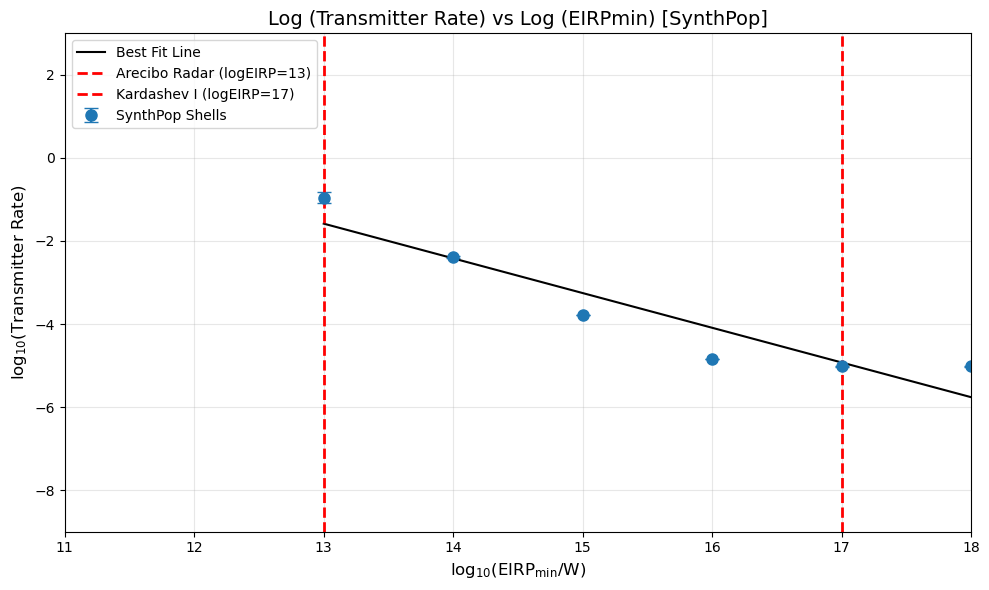

In [243]:
plot_transmitter_rate_vs_eirpmin_synthpop(shell_results, nu_rel=0.769)

In [245]:
quantify_slope(shell_results, nu_rel=0.769)

(np.float64(-0.8356901632992622), np.float64(9.281591299264532))

In [261]:
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import synthpop  # Make sure this is your SynthPop package
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

def parallel_batch_synthpop_pipeline(
    sightline_df,
    n_sightlines=100,
    limit_distance_pc=10000,
    min_distance_pc=0,
    output_prefix='synthpop_batch',
    batch_size=10,
    max_workers=5,
    sleep_between_batches=5,
    fmin=1e-26,
    nu_rel=0.769,
    n_shells=8,
    log_eirp_shells=None,
    config_file='huston2025_defaults.synthpop_conf'
):
    """
    Parallelized, batch-based SynthPop sightline processing and concatenation with advanced customization.
    Each batch is saved as a CSV. At the end, all CSVs are concatenated and shell statistics are computed.

    Parameters
    ----------
    sightline_df : pandas.DataFrame
        DataFrame with columns 'ra', 'dec', 'fwhm_arcmin'.
    n_sightlines : int
        Number of sightlines to process.
    limit_distance_pc : float
        Maximum distance (pc) for inclusion.
    min_distance_pc : float
        Minimum distance (pc) for inclusion.
    output_prefix : str
        Prefix for batch CSV files.
    batch_size : int
        Number of sightlines per batch.
    max_workers : int
        Number of parallel workers.
    sleep_between_batches : int
        Seconds to sleep between batches.
    fmin : float
        Minimum detectable flux density (W m^-2 Hz^-1).
    nu_rel : float
        Relative observing bandwidth.
    n_shells : int
        Number of EIRPmin shells (if log_eirp_shells not provided).
    log_eirp_shells : array-like, optional
        Custom log10(EIRPmin) shell boundaries.
    config_file : str
        Path to SynthPop configuration file.

    Returns
    -------
    all_df : pandas.DataFrame
        Concatenated DataFrame of all results.
    shell_results : pandas.DataFrame
        Shell statistics DataFrame.
    """

    def angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs):
        c1 = SkyCoord(beam_ra, beam_dec, unit='deg')
        c2 = SkyCoord(star_ras, star_decs, unit='deg')
        return c1.separation(c2).arcminute

    def beam_scaling(beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin):
        theta_arcmin = angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs)
        exponent = -4 * np.log(2) * (theta_arcmin / fwhm_arcmin)**2
        scaling_factor = np.exp(exponent)
        eirp_boost = np.where(scaling_factor > 0, 1.0 / scaling_factor, np.inf)
        return theta_arcmin, scaling_factor, eirp_boost

    def process_beam_vectorized(beam_ra, beam_dec, fwhm_arcmin, df):
        df = df.copy()
        star_ras = df['ra'].to_numpy()
        star_decs = df['dec'].to_numpy()
        theta, scaling, eirp = beam_scaling(
            beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin)
        df['theta_arcmin'] = theta
        df['scaling_factor'] = scaling
        df['eirp_boost'] = eirp
        return df

    def calculate_log_eirpmin(df, fmin):
        log_4pi = np.log10(4 * np.pi)
        d_m = df["Dist_pc"].to_numpy() * 3.086e16  # parsecs to meters
        df['logEIRPmin'] = log_4pi + 2 * np.log10(d_m) + np.log10(fmin) + np.log10(df['eirp_boost'])
        # Add max distance at EIRPmin for scaling factor = 1 (pc)
        eirpmin = 10 ** df['logEIRPmin']
        d_max_m = np.sqrt(eirpmin / (4 * np.pi * fmin))
        df['max_distance_pc_at_eirpmin'] = d_max_m / 3.086e16
        return df

    def analyze_shells_with_uncertainty_cumulative_log_synth(df, log_eirp_shells, fmin, nu_rel):
        results = []
        for log_shell_val in log_eirp_shells:
            shell_val = 10**log_shell_val
            n_stars = np.sum(df['logEIRPmin'] <= log_shell_val)
            n_stars_err = np.sqrt(n_stars)
            if n_stars == 0:
                n_stars_err = 1
            cwtfm = (shell_val / 1e13) * (0.5 / nu_rel) * (1000 / n_stars) if n_stars > 0 else np.nan
            cwtfm_err = cwtfm * (n_stars_err / n_stars) if n_stars > 0 else np.nan
            results.append({
                'EIRPmin_shell': shell_val,
                'n_stars': n_stars,
                'n_stars_err': n_stars_err,
                'CWTFM': cwtfm,
                'CWTFM_err': cwtfm_err
            })
        return pd.DataFrame(results)

    # If log_eirp_shells not provided, generate dynamically based on fmin and min/max distance
    if log_eirp_shells is None:
        d_max_m = limit_distance_pc * 3.086e16
        d_min_m = max(min_distance_pc, 1) * 3.086e16
        eirpmin_max = 4 * np.pi * d_max_m**2 * fmin
        eirpmin_min = 4 * np.pi * d_min_m**2 * fmin
        log_min = np.floor(np.log10(eirpmin_min))
        log_max = np.ceil(np.log10(eirpmin_max))
        log_eirp_shells = np.linspace(log_min, log_max, n_shells)

    ra_array = sightline_df['ra'].to_numpy()
    dec_array = sightline_df['dec'].to_numpy()
    fwhm_array = sightline_df['fwhm_arcmin'].to_numpy()
    n_total = min(len(ra_array), len(dec_array), len(fwhm_array), n_sightlines)

    # Initialize SynthPop ONCE
    mod = synthpop.SynthPop(
        config_file,
        extinction_map_kwargs={'name':'maps_from_dustmaps', 'dustmap_name': 'sfd'},
        chosen_bands=['Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I',
                      "Gaia_G_EDR3", "Gaia_BP_EDR3", "Gaia_RP_EDR3"],
        maglim=['Bessell_I', 99, "keep"],
        post_processing_kwargs=[{"name": "ProcessDarkCompactObjects", "remove": False},
                               {"name": "equatorial_coordinates"}],
        name_for_output='mod2test'
    )
    mod.init_populations()

    batch_files = []

    def process_sightline_batch(batch_indices, batch_idx):
        batch_results = []
        for i in batch_indices:
            ra_deg = ra_array[i]
            dec_deg = dec_array[i]
            fwhm_arcmin = fwhm_array[i]
            coord = SkyCoord(ra=ra_deg * u.deg, dec=dec_deg * u.deg, frame='icrs')
            l = coord.galactic.l.deg
            b = coord.galactic.b.deg
            radius_deg = (fwhm_arcmin / 2) / 60
            solid_angle_deg2 = np.pi * radius_deg**2
            cat, distr = mod.process_location(
                l_deg=l, b_deg=b,
                solid_angle=solid_angle_deg2,
                solid_angle_unit='deg^2'
            )
            # Convert galactic to equatorial if needed (should already be in 'ra', 'dec')
            cat["Dist_pc"] = cat["Dist"] * 1000
            cat = process_beam_vectorized(ra_deg, dec_deg, fwhm_arcmin, cat)
            # Filter by distance
            cat = cat[(cat["Dist_pc"] <= limit_distance_pc) & (cat["Dist_pc"] >= min_distance_pc)].copy()
            cat['input_ra'] = ra_deg
            cat['input_dec'] = dec_deg
            cat['input_fwhm_arcmin'] = fwhm_arcmin
            batch_results.append(cat)
        if batch_results:
            batch_df = pd.concat(batch_results, ignore_index=True)
            filename = f"{output_prefix}_batch{batch_idx}.csv"
            batch_df.to_csv(filename, index=False)
            return filename
        return None

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = []
        for batch_start in range(0, n_total, batch_size):
            batch_end = min(batch_start + batch_size, n_total)
            batch_indices = list(range(batch_start, batch_end))
            futures.append(executor.submit(process_sightline_batch, batch_indices, batch_start // batch_size))
            time.sleep(sleep_between_batches)
        for future in as_completed(futures):
            fname = future.result()
            if fname is not None:
                batch_files.append(fname)

    # Concatenate all batch files
    if batch_files:
        dfs = [pd.read_csv(f) for f in batch_files]
        all_df = pd.concat(dfs, ignore_index=True)
        all_df = calculate_log_eirpmin(all_df, fmin)
        shell_results = analyze_shells_with_uncertainty_cumulative_log_synth(all_df, log_eirp_shells, fmin, nu_rel)
        all_df.to_csv(f"{output_prefix}_ALL.csv", index=False)
    else:
        print("No results fetched.")
        all_df = pd.DataFrame()
        shell_results = pd.DataFrame()

    return all_df, shell_results

In [262]:
df_small

,ra,dec,fwhm_arcmin
0,124.373564,-61.916283,6.4
500,235.157257,-50.986211,6.4
5000,6.639102,-41.840455,6.4
50000,337.162703,18.968371,8.4
100000,104.347052,-24.647317,6.4
200000,264.242801,-44.312320,5.5
300000,296.382669,33.565181,5.5


# 121 Seconds

In [263]:
all_df, shell_results = parallel_batch_synthpop_pipeline(
    sightline_df=df_small,
    n_sightlines=len(df_small),
    limit_distance_pc=10000,
    min_distance_pc=0,
    output_prefix='synthpop_batch',
    batch_size=10,
    max_workers=5,
    sleep_between_batches=5,
    fmin=1e-26,
    nu_rel=0.769,
    n_shells=None,
    log_eirp_shells=np.linspace(11,18,8),
    config_file='huston2025_defaults.synthpop_conf'
)




################################ Settings #################################
 985181694 - # reading default parameters from
 985181699 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 985181703 - # read configuration from 
 985181703 - config_file = 'huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 985181708 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 1183834892,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "a

In [264]:
all_df

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor,eirp_boost,input_ra,input_dec,input_fwhm_arcmin,logEIRPmin,max_distance_pc_at_eirpmin
0,1.0,0.115308,14.000000,-1.190434,0.115306,0.0,4.029935,124.321820,-61.936628,-80.060116,...,0.0,4029.934658,1.903913,0.782416,1.278093,124.373564,-61.916283,6.4,15.395160,4555.952823
1,1.0,0.229660,14.000000,-1.451580,0.229653,0.0,4.423084,124.310202,-61.905767,-211.263058,...,0.0,4423.084283,1.897963,0.783615,1.276137,124.373564,-61.916283,6.4,15.475350,4996.592381
2,1.0,0.217807,14.000000,-1.450709,0.217800,0.0,5.959247,124.326213,-61.870031,-163.029470,...,0.0,5959.246826,3.081023,0.525943,1.901347,124.373564,-61.916283,6.4,15.907446,8217.166471
3,1.0,0.086501,14.000000,-1.838401,0.086501,0.0,6.154833,124.274149,-61.895937,203.423309,...,0.0,6154.832804,3.062791,0.529946,1.886985,124.373564,-61.916283,6.4,15.932203,8454.744956
4,1.0,0.201672,14.000000,-1.375471,0.201666,0.0,6.494021,124.368237,-61.955512,116.710246,...,0.0,6494.021020,2.358546,0.686230,1.457238,124.373564,-61.916283,6.4,15.866559,7839.328573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135659,10.0,0.283471,7.932596,-0.459962,0.283467,0.0,9.991745,296.426267,33.540690,-80.247609,...,0.0,9991.745329,2.629025,0.530729,1.884202,296.382669,33.565181,5.5,16.352412,13715.293156
135660,10.0,0.439281,7.489558,-0.361333,0.439271,0.0,9.915189,296.411084,33.577293,-68.077093,...,0.0,9915.188977,1.595617,0.791872,1.262830,296.382669,33.565181,5.5,16.171949,11142.263282
135661,10.0,0.159954,7.072073,-0.365875,0.159952,0.0,9.969510,296.367172,33.547392,-110.606984,...,0.0,9969.510467,1.318989,0.852607,1.172873,296.382669,33.565181,5.5,16.144600,10796.907069
135662,10.0,1.072499,9.456370,-0.384744,0.510902,1.0,9.982787,296.359705,33.583169,-77.707110,...,1.0,9982.787300,1.575672,0.796476,1.255530,296.382669,33.565181,5.5,16.175332,11185.755978


In [265]:
shell_results

,EIRPmin_shell,n_stars,n_stars_err,CWTFM,CWTFM_err
0,1.000000e+11,0,1.000000,NaN,NaN
1,1.000000e+12,1,1.000000,65.019506,65.019506
2,1.000000e+13,22,4.690416,29.554321,6.301002
3,1.000000e+14,328,18.110770,19.823020,1.094543
4,1.000000e+15,7864,88.679197,8.267994,0.093235
5,1.000000e+16,90805,301.338680,7.160344,0.023762
6,1.000000e+17,135664,368.325943,47.926868,0.130121
7,1.000000e+18,135664,368.325943,479.268677,1.301208


In [270]:
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import synthpop  # Make sure this is your SynthPop package
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

def parallel_batch_synthpop_pipeline(
    sightline_df,
    n_sightlines=100,
    limit_distance_pc=10000,
    min_distance_pc=0,
    output_prefix='synthpop_batch',
    batch_size=10,
    max_workers=5,
    sleep_between_batches=5,
    fmin=1e-26,
    nu_rel=0.769,
    n_shells=8,
    log_eirp_shells=None,
    config_file='huston2025_defaults.synthpop_conf'
):
    """
    Parallelized, batch-based SynthPop sightline processing and concatenation with advanced customization.
    Each batch is saved as a CSV. At the end, all CSVs are concatenated and shell statistics are computed.

    Parameters
    ----------
    sightline_df : pandas.DataFrame
        DataFrame with columns 'ra', 'dec', 'fwhm_arcmin'.
    n_sightlines : int
        Number of sightlines to process.
    limit_distance_pc : float
        Maximum distance (pc) for inclusion.
    min_distance_pc : float
        Minimum distance (pc) for inclusion.
    output_prefix : str
        Prefix for batch CSV files.
    batch_size : int
        Number of sightlines per batch.
    max_workers : int
        Number of parallel workers.
    sleep_between_batches : int
        Seconds to sleep between batches.
    fmin : float
        Minimum detectable flux density (W m^-2 Hz^-1).
    nu_rel : float
        Relative observing bandwidth.
    n_shells : int
        Number of EIRPmin shells (if log_eirp_shells not provided).
    log_eirp_shells : array-like, optional
        Custom log10(EIRPmin) shell boundaries.
    config_file : str
        Path to SynthPop configuration file.

    Returns
    -------
    all_df : pandas.DataFrame
        Concatenated DataFrame of all results.
    shell_results : pandas.DataFrame
        Shell statistics DataFrame.
    """

    def angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs):
        c1 = SkyCoord(beam_ra, beam_dec, unit='deg')
        c2 = SkyCoord(star_ras, star_decs, unit='deg')
        return c1.separation(c2).arcminute

    def beam_scaling(beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin):
        theta_arcmin = angular_separation_arcmin(beam_ra, beam_dec, star_ras, star_decs)
        exponent = -4 * np.log(2) * (theta_arcmin / fwhm_arcmin)**2
        scaling_factor = np.exp(exponent)
        eirp_boost = np.where(scaling_factor > 0, 1.0 / scaling_factor, np.inf)
        return theta_arcmin, scaling_factor, eirp_boost

    def process_beam_vectorized(beam_ra, beam_dec, fwhm_arcmin, df):
        df = df.copy()
        star_ras = df['ra'].to_numpy()
        star_decs = df['dec'].to_numpy()
        theta, scaling, eirp = beam_scaling(
            beam_ra, beam_dec, star_ras, star_decs, fwhm_arcmin)
        df['theta_arcmin'] = theta
        df['scaling_factor'] = scaling
        df['eirp_boost'] = eirp
        return df

    def calculate_log_eirpmin(df, fmin):
        log_4pi = np.log10(4 * np.pi)
        d_m = df["Dist_pc"].to_numpy() * 3.086e16  # parsecs to meters
        df['logEIRPmin'] = log_4pi + 2 * np.log10(d_m) + np.log10(fmin) + np.log10(df['eirp_boost'])
        # Add max distance at EIRPmin for scaling factor = 1 (pc)
        eirpmin = 10 ** df['logEIRPmin']
        d_max_m = np.sqrt(eirpmin / (4 * np.pi * fmin))
        df['max_distance_pc_at_eirpmin'] = d_max_m / 3.086e16
        return df

    def analyze_shells_with_uncertainty_cumulative_log_synth(df, log_eirp_shells, fmin, nu_rel):
        results = []
        for log_shell_val in log_eirp_shells:
            shell_val = 10**log_shell_val
            n_stars = np.sum(df['logEIRPmin'] <= log_shell_val)
            n_stars_err = np.sqrt(n_stars)
            if n_stars == 0:
                n_stars_err = 1
            cwtfm = (shell_val / 1e13) * (0.5 / nu_rel) * (1000 / n_stars) if n_stars > 0 else np.nan
            cwtfm_err = cwtfm * (n_stars_err / n_stars) if n_stars > 0 else np.nan
            results.append({
                'EIRPmin_shell': shell_val,
                'n_stars': n_stars,
                'n_stars_err': n_stars_err,
                'CWTFM': cwtfm,
                'CWTFM_err': cwtfm_err
            })
        return pd.DataFrame(results)

    # If log_eirp_shells not provided, generate dynamically based on fmin and min/max distance
    if log_eirp_shells is None:
        d_max_m = limit_distance_pc * 3.086e16
        d_min_m = max(min_distance_pc, 1) * 3.086e16
        eirpmin_max = 4 * np.pi * d_max_m**2 * fmin
        eirpmin_min = 4 * np.pi * d_min_m**2 * fmin
        log_min = np.floor(np.log10(eirpmin_min))
        log_max = np.ceil(np.log10(eirpmin_max))
        log_eirp_shells = np.linspace(log_min, log_max, n_shells)

    ra_array = sightline_df['ra'].to_numpy()
    dec_array = sightline_df['dec'].to_numpy()
    fwhm_array = sightline_df['fwhm_arcmin'].to_numpy()
    n_total = min(len(ra_array), len(dec_array), len(fwhm_array), n_sightlines)

    # Initialize SynthPop ONCE
    mod = synthpop.SynthPop(
        config_file,
        extinction_map_kwargs={'name':'maps_from_dustmaps', 'dustmap_name': 'sfd'},
        chosen_bands=['Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I',
                      "Gaia_G_EDR3", "Gaia_BP_EDR3", "Gaia_RP_EDR3"],
        maglim=['Bessell_I', 99, "keep"],
        post_processing_kwargs=[{"name": "ProcessDarkCompactObjects", "remove": False},
                               {"name": "equatorial_coordinates"}],
        name_for_output='mod2test'
    )
    mod.init_populations()

    batch_files = []

    def process_sightline_batch(batch_indices, batch_idx):
        batch_results = []
        for i in batch_indices:
            ra_deg = ra_array[i]
            dec_deg = dec_array[i]
            fwhm_arcmin = fwhm_array[i]
            coord = SkyCoord(ra=ra_deg * u.deg, dec=dec_deg * u.deg, frame='icrs')
            l = coord.galactic.l.deg
            b = coord.galactic.b.deg
            radius_deg = (fwhm_arcmin / 2) / 60
            solid_angle_deg2 = np.pi * radius_deg**2
            cat, distr = mod.process_location(
                l_deg=l, b_deg=b,
                solid_angle=solid_angle_deg2,
                solid_angle_unit='deg^2'
            )
            # Convert galactic to equatorial if needed (should already be in 'ra', 'dec')
            cat["Dist_pc"] = cat["Dist"] * 1000
            cat = process_beam_vectorized(ra_deg, dec_deg, fwhm_arcmin, cat)
            # Filter by distance
            cat = cat[(cat["Dist_pc"] <= limit_distance_pc) & (cat["Dist_pc"] >= min_distance_pc)].copy()
            cat['input_ra'] = ra_deg
            cat['input_dec'] = dec_deg
            cat['input_fwhm_arcmin'] = fwhm_arcmin
            batch_results.append(cat)
        if batch_results:
            batch_df = pd.concat(batch_results, ignore_index=True)
            filename = f"{output_prefix}_batch{batch_idx}.csv"
            batch_df.to_csv(filename, index=False)
            return filename
        return None

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = []
        for batch_start in range(0, n_total, batch_size):
            batch_end = min(batch_start + batch_size, n_total)
            batch_indices = list(range(batch_start, batch_end))
            futures.append(executor.submit(process_sightline_batch, batch_indices, batch_start // batch_size))
            time.sleep(sleep_between_batches)
        for future in as_completed(futures):
            fname = future.result()
            if fname is not None:
                batch_files.append(fname)

    # Concatenate all batch files
    if batch_files:
        dfs = [pd.read_csv(f) for f in batch_files]
        all_df = pd.concat(dfs, ignore_index=True)
        all_df = calculate_log_eirpmin(all_df, fmin)
        shell_results = analyze_shells_with_uncertainty_cumulative_log_synth(all_df, log_eirp_shells, fmin, nu_rel)
        all_df.to_csv(f"{output_prefix}_ALL.csv", index=False)
    else:
        print("No results fetched.")
        all_df = pd.DataFrame()
        shell_results = pd.DataFrame()

    return all_df, shell_results

In [272]:
all_df, shell_results = parallel_batch_synthpop_pipeline(
    sightline_df=df_small,
    n_sightlines=len(df_small),
    limit_distance_pc=10000,
    min_distance_pc=0,
    output_prefix='synthpop_batch',
    batch_size=10,
    max_workers=5,
    sleep_between_batches=5,
    fmin=1e-26,
    nu_rel=0.769,
    n_shells=None,
    log_eirp_shells=np.linspace(11,18,8),
    config_file='huston2025_defaults.synthpop_conf'
)
all_df



################################ Settings #################################
 1731646878 - # reading default parameters from
 1731646880 - default_config_file =  /Users/MattLor/synthpop/synthpop/config_files/_default.synthpop_conf 
 1731646883 - # read configuration from 
 1731646883 - config_file = 'huston2025_defaults.synthpop_conf' 


# copy the following to a config file to redo this model generation -------
 1731646887 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "name_for_output": "mod2test",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "random_seed": 1455123305,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
     

,pop,iMass,age,Fe/H_initial,Mass,In_Final_Phase,Dist,ra,dec,vr_bc,...,Dim_Compact_Object_Flag,Dist_pc,theta_arcmin,scaling_factor,eirp_boost,input_ra,input_dec,input_fwhm_arcmin,logEIRPmin,max_distance_pc_at_eirpmin
0,1.0,0.084793,14.000000,-2.404090,0.084793,0.0,1.434586,124.376752,-61.938033,2.671251,...,0.0,1434.585940,1.308101,0.890630,1.122801,124.373564,-61.916283,6.4,14.441758,1520.120449
1,1.0,0.606172,14.000000,-1.493709,0.606064,0.0,6.183120,124.457219,-61.910202,-58.166080,...,0.0,6183.120481,2.391122,0.679080,1.472580,124.373564,-61.916283,6.4,15.828496,7503.211290
2,1.0,0.417141,14.000000,-1.948261,0.417119,0.0,6.200891,124.282220,-61.898371,0.314849,...,0.0,6200.890591,2.795654,0.589168,1.697310,124.373564,-61.916283,6.4,15.892671,8078.572854
3,1.0,0.146110,14.000000,-2.534891,0.146106,0.0,6.635064,124.351001,-61.936754,67.235338,...,0.0,6635.064466,1.383639,0.878456,1.138361,124.373564,-61.916283,6.4,15.777972,7079.217183
4,1.0,0.890575,14.000000,-1.981484,0.491073,1.0,6.876936,124.472986,-61.920610,73.498987,...,1.0,6876.935816,2.820020,0.583736,1.713104,124.373564,-61.916283,6.4,15.986575,9000.918271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135988,10.0,0.163744,8.593438,-0.340126,0.163742,0.0,9.983720,296.332791,33.545567,-66.238486,...,0.0,9983.720486,2.757694,0.498062,2.007783,296.382669,33.565181,5.5,16.379303,14146.558378
135989,10.0,0.426002,7.385234,-0.515518,0.425993,0.0,9.937604,296.357511,33.541908,-264.840920,...,0.0,9937.603981,1.879450,0.723425,1.382314,296.382669,33.565181,5.5,16.213172,11683.824566
135990,10.0,0.276180,8.964136,-0.049657,0.276176,0.0,9.955562,296.333473,33.562410,-115.127618,...,0.0,9955.562475,2.465228,0.572911,1.745471,296.382669,33.565181,5.5,16.316046,13152.919018
135991,10.0,0.092098,8.841648,-0.355192,0.092098,0.0,9.923346,296.360770,33.603149,-74.743790,...,0.0,9923.346283,2.527381,0.556846,1.795827,296.382669,33.565181,5.5,16.325583,13298.125001
